# A. Model Rating Bintang

## 1. Data Preparing

In [ ]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
import emoji

In [ ]:
import pandas as pd
import numpy as np
import pickle
import shutil
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
import re
from datetime import datetime, timedelta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_review = pd.read_csv("/content/drive/MyDrive/INTELLIGO/SEMIFINAL/gabungan_scrapping.csv")
df_review.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0495f963-ecc1-4bc5-a5e1-1ccfe1557dd9,Renu Milianti,https://play-lh.googleusercontent.com/a-/ALV-UjUbvVRKN0FMgZJQZd6XWCwhSclybEQKPgU9h5_8l_J77A,ekspedisi tidak amanah,1,0,1.8.80,2023-09-30 22:34:17,NaN,NaN,1.8.80
1,8a52ea89-628f-48ed-be68-dfbeff49e058,Alan Maulana,https://play-lh.googleusercontent.com/a-/ALV-UjX_-H7stVqQQXz280DA9-AnxnU3_UxWpnYTHfGJ9v7zVV4,"gw doanload cuman buat kasih bintang 1, gw nggk buka aplikasinya, kurir nggak jelas kirim brng nya.. alasannya kendala mulu, taeee.. tutup ajh sekalian nggk usah buka ekpedisi..",1,0,1.8.80,2023-09-30 19:16:51,NaN,NaN,1.8.80
2,ae66c2d3-82e8-4687-8e1a-373167923cdb,Barista Motovlog,https://play-lh.googleusercontent.com/a-/ALV-UjXDnbghp3ZfHf5clM7w-vBzWxOJEagFsGGqTx60ejD5ZVo,"Pilih jasa Same Day, tapi 2 hari ga sampai sampai 😞",1,0,1.8.80,2023-09-30 12:57:13,NaN,NaN,1.8.80
3,e02d46dd-3d96-4445-8f1f-8efe022fff0d,ibnu juni,https://play-lh.googleusercontent.com/a-/ALV-UjWkv7ejdC42ogLAosMlzWqSG_N5KpC9oAmKkg_k0UvGPw,"Kurir paling gk jelas yang pernah saya pakai, 5x pengiriman smua paket hilang .",1,0,1.8.80,2023-09-30 12:44:03,NaN,NaN,1.8.80
4,20a09969-ee3c-45d9-b53f-a18eedfb9c27,Lyra Mo,https://play-lh.googleusercontent.com/a-/ALV-UjWVnxEmuCcwJ7YDjmWi01pmscECeotJPsxpXk7aOfmb3A,Aplikasinya sangat membantu untuk delivery nya sangat cepat juga kurir nya ramah dan baik,5,0,1.8.80,2023-09-30 11:11:07,NaN,NaN,1.8.80


In [ ]:
df_review['at'] = pd.to_datetime(df_review['at'])

# Calculate the latest date in the DataFrame
latest_date = df_review['at'].max()

# Calculate the date 3 months ago from the latest date
three_months_ago = latest_date - pd.DateOffset(months=3)

# Filter the DataFrame to include only rows within the date range
df_review = df_review[(df_review['at'] >= three_months_ago) & (df_review['at'] <= latest_date)].reset_index(drop=True)

# Now, filtered_df contains only the data from the latest date to 3 months ago
df_review.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0495f963-ecc1-4bc5-a5e1-1ccfe1557dd9,Renu Milianti,https://play-lh.googleusercontent.com/a-/ALV-UjUbvVRKN0FMgZJQZd6XWCwhSclybEQKPgU9h5_8l_J77A,ekspedisi tidak amanah,1,0,1.8.80,2023-09-30 22:34:17,NaN,NaN,1.8.80
1,8a52ea89-628f-48ed-be68-dfbeff49e058,Alan Maulana,https://play-lh.googleusercontent.com/a-/ALV-UjX_-H7stVqQQXz280DA9-AnxnU3_UxWpnYTHfGJ9v7zVV4,"gw doanload cuman buat kasih bintang 1, gw nggk buka aplikasinya, kurir nggak jelas kirim brng nya.. alasannya kendala mulu, taeee.. tutup ajh sekalian nggk usah buka ekpedisi..",1,0,1.8.80,2023-09-30 19:16:51,NaN,NaN,1.8.80
2,ae66c2d3-82e8-4687-8e1a-373167923cdb,Barista Motovlog,https://play-lh.googleusercontent.com/a-/ALV-UjXDnbghp3ZfHf5clM7w-vBzWxOJEagFsGGqTx60ejD5ZVo,"Pilih jasa Same Day, tapi 2 hari ga sampai sampai 😞",1,0,1.8.80,2023-09-30 12:57:13,NaN,NaN,1.8.80
3,e02d46dd-3d96-4445-8f1f-8efe022fff0d,ibnu juni,https://play-lh.googleusercontent.com/a-/ALV-UjWkv7ejdC42ogLAosMlzWqSG_N5KpC9oAmKkg_k0UvGPw,"Kurir paling gk jelas yang pernah saya pakai, 5x pengiriman smua paket hilang .",1,0,1.8.80,2023-09-30 12:44:03,NaN,NaN,1.8.80
4,20a09969-ee3c-45d9-b53f-a18eedfb9c27,Lyra Mo,https://play-lh.googleusercontent.com/a-/ALV-UjWVnxEmuCcwJ7YDjmWi01pmscECeotJPsxpXk7aOfmb3A,Aplikasinya sangat membantu untuk delivery nya sangat cepat juga kurir nya ramah dan baik,5,0,1.8.80,2023-09-30 11:11:07,NaN,NaN,1.8.80


In [ ]:
# Download the punkt tokenizer models
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def get_word_frequency(dataframe, column_name):
    # Tokenize the sentences and create a list of words
    word_list = [word.lower() for sentence in dataframe[column_name] for word in word_tokenize(sentence)]

    # Create a frequency distribution of words
    word_freq = FreqDist(word_list)

    # Create a dataframe from the frequency distribution
    word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

    # Sort the dataframe by frequency in descending order
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

    # Reset the index for the dataframe
    word_freq_df = word_freq_df.reset_index(drop=True)

    return word_freq_df

# Sample dataframe with a column of sentences
data = {'Sentences': [
    'This is a sample sentence.',
    'Another sentence with some words.',
    'This is a sample sentence.'
]}

df = pd.DataFrame(data)

# Call the function with your dataframe and column name
result_df = get_word_frequency(df, 'Sentences')

# Print the result
print(result_df)

       Word  Frequency
0  sentence          3
1         .          3
2      this          2
3        is          2
4         a          2
5    sample          2
6   another          1
7      with          1
8      some          1
9     words          1


In [ ]:
len(df_review)

4886

In [ ]:
df_word_count = get_word_frequency(df_review, 'content')

In [ ]:
df_word_count.head(50)

,Word,Frequency
0,",",116467
1,.,74833
2,di,58980
3,saya,41276
4,!,35850
5,paket,35410
6,ini,27628
7,pengiriman,26503
8,nya,26223
9,..,25923


In [ ]:
len(df_word_count)

72843

In [ ]:
# Function to extract unique emoticons from all strings in 'text_column'
def extract_unique_emoticons(df):
    all_emoticons = set()
    for text in df['content']:
        emoticons = re.findall(r'\p{Emoji}', text)  # Unicode property escapes for emoji
        all_emoticons.update(emoticons)
    return list(all_emoticons)

In [ ]:
def extract_unique_emoticons(df):
    all_emoticons = set()
    for text in df['content']:
        emoticons = [c for c in text if c in emoji.UNICODE_EMOJI['en']]
        all_emoticons.update(emoticons)
    return list(all_emoticons)

In [ ]:
# Inisialisasi set kosong untuk menyimpan tanda baca
unique_punctuation = set()
unique_emoticons = set()

for i in range(df_review.shape[0]):
    tweet = df_review['content'][i]
    punctuation = re.findall(r'[!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]+(?:\s*[!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]+)*', tweet)

    # Menggunakan regex untuk mencocokkan emotikon
    emoticons = re.findall(r'[^\w\s]', tweet)
    unique_emoticons.update(emoticons)
    unique_punctuation.update(punctuation)

In [ ]:
for punctuation in unique_punctuation:
    print(punctuation)

", "
? ?
" ,.
,, &
.-.
: "
..........,,,,,,,,
.. :)
%.
" ?..
":/
....(
,......
". #
......(
->+
:)"
:"),
...?..
****
; -
...!
..???!!!!!
!..
,,,..
:((((
!!..!!!!
.!!
...!!!!!
.!!..
.. -_-
. '
. !!
.. !!!!!
*,
; #
:(:(:(
.....???
....!!!! #
:(,
!!!!!!!!
,,, (
-.-
-___
,_
. !!!!!!
....!!!?
.....)
",
,..!!
;....
!!! 
,
.,...
!??
,,,,,
:(
..!!!!!!!!
...,???
......!!!!!!!!!!!!!
!.
"/
;(
....??????????????
,..,.,.,.,.
!!!!!!!!,
: @
[
?'
.. &
(-)
,, #
?? ..
.?
&*
!(
,,,,,,
,,,,,,,,,,,,
----
............ ????????!!!??!!!!
,..
<
...!,
.. :
."
!!! .
'.
.....!!!!
-@
. ....
??,.......
: 
*********************************
). #
!!!!!!! @
" ....
......!!!!?
.... !!!
!!!....
......!!!!!????...!!!!!!!!!!!!!!!!!!....!!!
????!!!!!
/(
,,,,,,,
" !
.. . .... .
). .
..?
)?
....??????
...!! !!(
...!!!!!!!!!!!!
!!  ,
>>
""...
' *
!!!,,
!! ,
; "
..  .
?"
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
for emoticons in unique_emoticons:
    print(emoticons)

👍
🅾
💚
️
༎
⡀
…
¿
?
👑
🍥
✖
⡉
🤦
͈
🏰
🫶
🖐
📒
🥱
🇮
⢤
🅴
💅
👫
‍
🚠
🤏
®
📈
्
’
⭐
🔒
👿
🔥
👭
⢈
🎁
📲
℅
﹏
☚
💗
🤗
🤠
°
🐨
🐖
😮
😫
🏁
→
☠
🍼
🤍
⃝
{
💔
ّ
🏾
🕍
🇦
🤜
🆎
⣰
🛁
✍
–
🤕
💨
⠄
⋆
`
☆
😃
⡙
🙂
⚠
⠽
💾
🏻
🖓
😚
🍒
👮
⣩
⡤
💦
🛍
⡾
🐱
.
*
🤔
🖤
📉
🚀
🌈
🍀
🍟
😏
ُ
🤩
✨
†
🖲
＼
⣝
☁
±
⠻
😴
🤮
☢
🍛
🍲
︵
⢲
🍱
👎
。
🐷
[
༽
👽
🍩
🍅
⠈
💋
💓
»
🌹
🤡
⁉
ै
🕌
😽
👇
🚶
😬
<
”
•
🪶
💯
ຶ
😿
🏣
‼
👨
☺
🔓
👏
🙃
💐
⡏
😋
📭
👗
,
：
🚆
👐
💁
‐
👩
⭕
=
🐢
😞
⠢
😑
🐟
🦴
⠋
╭
👄
🍎
❎
🎶
⠦
🤥
🚨
😎
😡
ी
ि
🎉
🤟
😝
🇬
(
⛔
✈
🐠
⠲
⣌
🇯
📧
⠚
🏩
💫
👸
🤎
🥹
🤼
🤑
💻
🛶
🔵
⣚
😅
🐕
😆
🤙
｜
♥
😭
🏽
∇
✔
¢
🧾
🦸
#
⠘
💢
🙇
⠹
🎽
“
⡬
🚫
😹
😕
⠇
🏿
（
🏮
💡
👖
ِ
≦
🏫
🐌
꧁
🥰
⢯
⠟
🌙
😥
%
👈
🌷
🤚
√
🇩
⠔
💟
🙊
⠉
💀
🚴
⣤
👡
;
😼
🆗
⠐
⠾
⠶
⏰
👊
✓
🐹
💰
😁
⡰
👉
👆
🐪
🍻
😧
🍪
🤌
🤣
⠒
💶
😦
📣
💜
◌
⚡
😓
¥
͜
≡
🍴
🥵
😍
⣷
👠
\
📙
⠤
／
🤸
🍞
≧
🆖
📞
☝
⣽
َ
🍵
💌
👟
🥔
⣈
🔂
👶
⢖
😌
📛
🛂
🌺
🚧
^
🏘
🙌
⠳
‘
⃣
🤯
े
🌎
🐐
😊
😂
×
🔝
🩹
👁
😄
￼
⡼
🥒
⠀
❌
/
🌟
😉
⢉
©
📨
🙈
🧡
⣀
🥚
▽
¡
:
🅺
😷
😜
👋
👼
🥳
❗
🍣
⡲
🤫
⡴
🙄
🇲
+
🌝
👌
$
🫀
💝
🍓
💙
🤲
🫠
😐
🤝
😶
🖕
🇿
⢥
🐶
🍹
📍
🚿
☎
╮
💖
⣆
‿
🏌
👙
🔍
⣠
🇧
🤐
⢹
🏼
🐽
👦
｡
💃
🎄
😳
🥺
🍭
😇
༼
🏠
🚽
>
🍦
🐄
💆
🍜
👬
🍄
♂
😲
'
💕
🌚
🏢
🥴
🖒
♀
📠
📵
⚧
🏴
🌭
🌞
🤞
😗
⢠
☹
⡞
🤒
⣟
😖
🍶
´
🤬
？
👧
☄
🌼
🧠
⣙
🔧
🇫
💥
🙅
👀
⢧
⑅
🐬
🇴
🫂
💷
💘
✋
⁠
🦨
🍇
😢
😵
😔
🍔
✅
♡
🫣
😯
😙
👛
|
❣
🐵
🚛
⛵
🍫
⠛
⡄
🤤
🔪
💛
꧂
&
🤘


## 2. Data Preprocessing

### a. Mengganti Emoji menjadi Kata

In [ ]:
df_emoji = pd.read_csv('drive/MyDrive/IFEST/emot_indo2.csv')
print(df_emoji.head(5))

  emoji        makna
0     😀  kebahagiaan
1     😃  kebahagiaan
2     😄  kebahagiaan
3     😁  kebahagiaan
4     😆         tawa


In [ ]:
df_content = df_review[['content']].copy()
df_content.head()

,content
0,ekspedisi tidak amanah
1,"gw doanload cuman buat kasih bintang 1, gw nggk buka aplikasinya, kurir nggak jelas kirim brng nya.. alasannya kendala mulu, taeee.. tutup ajh sekalian nggk usah buka ekpedisi.."
2,"Pilih jasa Same Day, tapi 2 hari ga sampai sampai 😞"
3,"Kurir paling gk jelas yang pernah saya pakai, 5x pengiriman smua paket hilang ."
4,Aplikasinya sangat membantu untuk delivery nya sangat cepat juga kurir nya ramah dan baik


In [ ]:
!pip install emoji


In [ ]:
import emoji


# Fungsi untuk mengecek apakah teks mengandung emotikon
def contains_emoticon(text):
    emoticon_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF]')
    return bool(emoticon_pattern.search(text))

# Menambahkan kolom baru 'contains_emoticon'
df_content['contains_emoticon'] = df_content['content'].apply(contains_emoticon)

# Menampilkan baris yang mengandung emotikon
baris_dengan_emot = df_content[df_content['contains_emoticon']]

baris_dengan_emot

,content,contains_emoticon
2,"Pilih jasa Same Day, tapi 2 hari ga sampai sam...",True
10,Terbantu banget sama aplikasi ini. Pengiriman ...,True
28,Anteraja salah satu ekspedisi yg selalu pick u...,True
29,3x pakai Sameday bayar nya mahal sampai nya ka...,True
37,Aplikasi ekspedisi tergila kacaunya. Kurir sop...,True
...,...,...
4783,Awal iseng test cari pengiriman dokumen lewat ...,True
4807,Saya kmrn di kebun raya pake motor no 4 C171 K...,True
4835,👍👍👍,True
4849,sangat membantu untuk pengiriman makanan 👍👍,True


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
# Membaca data CSV
data_emoji = df_emoji
data_content = baris_dengan_emot

# Membuat kamus untuk memetakan emotikon ke makna
emoji_to_meaning = {}
for index, row in data_emoji.iterrows():
    emoji_to_meaning[row['emoji']] = row['makna']

# Fungsi untuk mendapatkan makna dari emotikon
def get_meaning(emoji_char):
    return emoji_to_meaning.get(emoji_char, "")

# Mengganti kata dalam content yang mengandung emotikon dengan makna emotikon
for index, row in data_content.iterrows():
    if row['contains_emoticon']:
        content = row['content']
        emoticons = re.findall(r'[^\w\s]', content)
        meanings = [get_meaning(emoji_char) for emoji_char in emoticons]
        for emoji_char, meaning in zip(emoticons, meanings):
            if meaning:
                # Mencari posisi emoji dalam content
                pos = content.find(emoji_char)
                # Memeriksa apakah emoji diberikan spasi di depan
                if pos > 0 and content[pos - 1] != ' ':
                    meaning = ' ' + meaning
                # Memeriksa apakah emoji diberikan spasi di belakang
                if pos + len(emoji_char) < len(content) and content[pos + len(emoji_char)] != ' ':
                    meaning = meaning + ' '
                content = content.replace(emoji_char, meaning)
        data_content.at[index, 'content'] = content

data_content = data_content.drop(columns=['contains_emoticon'])
data_content


,content
2,"Pilih jasa Same Day, tapi 2 hari ga sampai sampai kecewa"
10,Terbantu banget sama aplikasi ini. Pengiriman cepat kurirnya juga ramah saya benar-benar terbantu banget.. Terimakasih anteraja berdoa berdoa berdoa berdoa
28,"Anteraja salah satu ekspedisi yg selalu pick up barangnya tepat waktu, kurirnya juga ramah. Sangat recommended jempolan"
29,3x pakai Sameday bayar nya mahal sampai nya kayak regular jempol ke bawah 🏿 jempol ke bawah 🏿 jempol ke bawah 🏿 jempol ke bawah 🏿 jempol ke bawah 🏿 jempol ke bawah 🏿
37,"Aplikasi ekspedisi tergila kacaunya. Kurir sopan dan ramah, tapi customer service dan komplain orderan tiba-tiba dibatalkan, namun duit tidak dikembalikan. Woy kembalikan saldo gue sudah 3X transaksi kaga ada kejelasannya jari tengah"
...,...
4783,"Awal iseng test cari pengiriman dokumen lewat google,, ketemu paxel coba kirim dokumen lewat aplikasi.. Order lewat apk tanggal 31 juli 2023 jam 10 pagi,, di jadwalkan pic up jam 2-5 siang.. Ternyata dokumen di pickup jam 3 siang.. Tanggal 01 agustus 2023 jam 12 barang sudah di dps dan sedang diantar ke alamat tujuan.. The best.. Tetap pertahankan kak jempolan 🏻"
4807,"Saya kmrn di kebun raya pake motor no 4 C171 KRB olive store 2 Udh di sken kaga kebuka lokernya, di bukain 1 per 1 ttp gada yg buka 1 loker pun, paket akhirnya di ambil kmbali tpi gada yg kebuka juga loker, & skrng status masih aktif sewa, padahal itu udh gak sewa krna gak bisa kebuka tawa ntahlah gmna itu jadinya. Takut disuruh ganti rugi aja sih klamaan nari barang padahal gada barangnya krna gak kebuka lokernya"
4835,jempolan jempolan jempolan
4849,sangat membantu untuk pengiriman makanan jempolan jempolan


In [ ]:
# Mengganti baris di data_train dengan data_content berdasarkan indeks
df_content_noemot = df_content.copy()
for index, row in data_content.iterrows():
    df_content_noemot.loc[index] = row
df_content_noemot = df_content_noemot.drop(columns=['contains_emoticon'])
df_content_noemot.head(20)

,content
0,ekspedisi tidak amanah
1,"gw doanload cuman buat kasih bintang 1, gw nggk buka aplikasinya, kurir nggak jelas kirim brng nya.. alasannya kendala mulu, taeee.. tutup ajh sekalian nggk usah buka ekpedisi.."
2,"Pilih jasa Same Day, tapi 2 hari ga sampai sampai kecewa"
3,"Kurir paling gk jelas yang pernah saya pakai, 5x pengiriman smua paket hilang ."
4,Aplikasinya sangat membantu untuk delivery nya sangat cepat juga kurir nya ramah dan baik
5,jangan pake jasa anter aja burukkkkk gak jelasss pake aja JNT YANG BAGUS DAN AKURAT TENTUNYA TEPAT WAKTU
6,"Pengiriman cepat, kurirnya super cepat pol recommended bangett pake jasa anteraja"
7,Aplikasi anteraja kurirnya ramah pengantarannya cepat dan juga biayanya sangat murah gak nguras kantong aplikasi ini rekomended deh pokoknya
8,Saya suka sekali dengan anteraja ini pengiriman cepat dan dapat di laccak dimana paket kita berada kurirnya pun ramah lumayan murah jga ongkirnya berasa tertolong banget
9,"Keren si Apk ini sangat bermanfaat banget kurir ramah, proses cepat pokonya top markotop bikin nagih rekomendasi banget ni yang sukanya sat set"


### b. Ganti Kata Tidak Baku dengan KAMUSALAY

In [ ]:
df_kamusalay = pd.read_csv('/content/drive/MyDrive/IFEST/new_kamusalay.csv', encoding='iso-8859-1', header=None)
df_kamusalay.head()

,0,1
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [ ]:
iter = 0
def correct_sentence(sentence, corrections_df):
    global iter
    for index, row in corrections_df.iterrows():
        typo = row[0]
        if typo not in sentence:
            continue
        corrected = row[1]
        sentence = re.sub(r'\b' + typo + r'\b', corrected, sentence, flags=re.IGNORECASE)
    iter += 1
    if iter%100 == 0:
        print("Data yang sudah diproses : " + str(iter) + "/" + "5036")
    return sentence

df_content_kamusalay = df_content_noemot.copy()
df_content_kamusalay = df_content_kamusalay.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_content_kamusalay['content_kamusalay'] = df_content_kamusalay['content'].apply(lambda x: correct_sentence(x, df_kamusalay))

Data yang sudah diproses : 100/5036
Data yang sudah diproses : 200/5036
Data yang sudah diproses : 300/5036
Data yang sudah diproses : 400/5036
Data yang sudah diproses : 500/5036
Data yang sudah diproses : 600/5036
Data yang sudah diproses : 700/5036
Data yang sudah diproses : 800/5036
Data yang sudah diproses : 900/5036
Data yang sudah diproses : 1000/5036
Data yang sudah diproses : 1100/5036
Data yang sudah diproses : 1200/5036
Data yang sudah diproses : 1300/5036
Data yang sudah diproses : 1400/5036
Data yang sudah diproses : 1500/5036
Data yang sudah diproses : 1600/5036
Data yang sudah diproses : 1700/5036
Data yang sudah diproses : 1800/5036
Data yang sudah diproses : 1900/5036
Data yang sudah diproses : 2000/5036
Data yang sudah diproses : 2100/5036
Data yang sudah diproses : 2200/5036
Data yang sudah diproses : 2300/5036
Data yang sudah diproses : 2400/5036
Data yang sudah diproses : 2500/5036
Data yang sudah diproses : 2600/5036
Data yang sudah diproses : 2700/5036
Data yang 

In [ ]:
df_content_kamusalay.head()

,content,content_kamusalay
0,ekspedisi tidak amanah,ekspedisi tidak amanah
1,"gw doanload cuman buat kasih bintang 1, gw nggk buka aplikasinya, kurir nggak jelas kirim brng nya.. alasannya kendala mulu, taeee.. tutup ajh sekalian nggk usah buka ekpedisi..","gue doanload cuma buat kasih bintang 1, gue tidak buka aplikasinya, kurir enggak jelas kirim barang nya.. alasannya kendala mulu, taeee.. tutup saja sekalian tidak usah buka ekpedisi.."
2,"pilih jasa same day, tapi 2 hari ga sampai sampai kecewa","pilih jasa sama day, tapi 2 hari tidak sampai sampai kecewa"
3,"kurir paling gk jelas yang pernah saya pakai, 5x pengiriman smua paket hilang .","kurir paling tidak jelas yang pernah saya pakai, lima kali pengiriman semua paket hilang ."
4,aplikasinya sangat membantu untuk delivery nya sangat cepat juga kurir nya ramah dan baik,aplikasinya sangat membantu untuk delivery nya sangat cepat juga kurir nya ramah dan baik


In [ ]:
df_content_kamusalay.to_csv('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/df_content_kamusalay.csv', index=False)

In [ ]:
df_content_kamusalay = pd.read_csv('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/df_content_kamusalay.csv')
df_content_kamusalay.head()

,content,content_kamusalay
0,ekspedisi tidak amanah,ekspedisi tidak amanah
1,"gw doanload cuman buat kasih bintang 1, gw nggk buka aplikasinya, kurir nggak jelas kirim brng nya.. alasannya kendala mulu, taeee.. tutup ajh sekalian nggk usah buka ekpedisi..","gue doanload cuma buat kasih bintang 1, gue tidak buka aplikasinya, kurir enggak jelas kirim barang nya.. alasannya kendala mulu, taeee.. tutup saja sekalian tidak usah buka ekpedisi.."
2,"pilih jasa same day, tapi 2 hari ga sampai sampai kecewa","pilih jasa sama day, tapi 2 hari tidak sampai sampai kecewa"
3,"kurir paling gk jelas yang pernah saya pakai, 5x pengiriman smua paket hilang .","kurir paling tidak jelas yang pernah saya pakai, lima kali pengiriman semua paket hilang ."
4,aplikasinya sangat membantu untuk delivery nya sangat cepat juga kurir nya ramah dan baik,aplikasinya sangat membantu untuk delivery nya sangat cepat juga kurir nya ramah dan baik


### c. Ganti Emot Karakter dengan Sentiment

In [ ]:
df_emotkarakter = pd.read_csv('drive/MyDrive/IFEST/dataset_emot_karakter.csv').astype(str)
df_emotkarakter.head()

,emot,arti
0,:(,sedih
1,:*,cium
2,:),senyum
3,:],senyum
4,:[,sedih


In [ ]:
df_emotkarakter.iloc[42]

emot         =_=
arti    frustasi
Name: 42, dtype: object

In [ ]:
def remove_consecutive_duplicate_punctuation(text):
    # Use regular expression to remove consecutive duplicate punctuation marks and underscores
    cleaned_text = re.sub(r'([^\w\s]|_)\1+', r'\1', text)
    return cleaned_text

In [ ]:
df_noemotkarakter = df_content_kamusalay.copy()
df_noemotkarakter = df_noemotkarakter.drop(columns='content')
df_noemotkarakter['content_kamusalay'] = df_noemotkarakter['content_kamusalay'].apply(remove_consecutive_duplicate_punctuation)
df_noemotkarakter.iloc[40:80]

,content_kamusalay
40,pengiriman cepat dan mudah reguler rasa nextday menyinggung jempolan
41,tampilan yang mudah digunakan dan aplikasi tersebut dapat diandalkan dalam pengiriman paket saya.good
42,"agak kecewa dengan anteraja sekarang,paketan untuk customer sudah 1 bulan belum ada kabar. sudah email ke pusat tidak ada follow up. mungkin sudah hilang kali ya. dan belum ada pengembalian dana."
43,"kualitas untuk pelanggan tidak baik gagal kirim barang karena pickupnya lama, dana pengembalian cash out pun tak kunjung dibayarkan ke costumer managementnya sepertinya tidak baik baik saja, setahun lagi juga tutup palingan. wkwk"
44,"aplikasi anteraja keren memudahkan kita untuk mengirim paket keluar daerah, pengiriman cepat. berapa jumlah paket langsung di jemput, cek barang kita juga mudah. ongkos kirim terjamin kurir ramah pastinya."
45,"aplikasinya bagus sangat memuaskan,kalau kirim paket pakai anteraja saja di jamin puas,kurir ramah-ramah, pengiriman cepat tidak pakai lama"
46,"jasa pengiriman anteraja sangat memuaskan pelayanannya,selain cepat dalam pickup barang kurirnya juga sangat ramah,anteraja top"
47,keren banget nih dengan adanya atareja sangat membantu untuk pengiriman paket yang cepat amanah dan kurir nya ramah
48,"jasa ekspedisi terpercaya, pick up tepat waktu dan deliverynya cepat"
49,pengirimannya cepat kurirnya ramah biaya pengiriman juga terjangkau tidak mahal pokoknya rekomendasi buat yang mau kirim ² bisa pakai antaraja


In [ ]:
for i in range(len(df_emotkarakter)):
    try:
        for j in range(len(df_noemotkarakter)):
            df_noemotkarakter.iloc[j, 0] = df_noemotkarakter.iloc[j, 0].replace(df_emotkarakter.iloc[i, 0], " " + str(df_emotkarakter.iloc[i, 1]) + " ")
    except:
        print(i)
        raise TypeError("wah")

In [ ]:
df_noemotkarakter.head()

,content_kamusalay
0,ekspedisi tidak amanah
1,"gue doanload cuma buat kasih bintang 1, gue tidak buka aplikasinya, kurir enggak jelas kirim barang nya. alasannya kendala mulu, taeee. tutup saja sekalian tidak usah buka ekpedisi."
2,"pilih jasa sama day, tapi 2 hari tidak sampai sampai kecewa"
3,"kurir paling tidak jelas yang pernah saya pakai, lima kali pengiriman semua paket hilang ."
4,aplikasinya sangat membantu untuk delivery nya sangat cepat juga kurir nya ramah dan baik


In [ ]:
df_noemotkarakter.iloc[40:80]

,content_kamusalay
40,pengiriman cepat dan mudah reguler rasa nextday menyinggung jempolan
41,tampilan yang mudah digunakan dan aplikasi tersebut dapat diandalkan dalam pengiriman paket saya.good
42,"agak kecewa dengan anteraja sekarang,paketan untuk customer sudah 1 bulan belum ada kabar. sudah email ke pusat tidak ada follow up. mungkin sudah hilang kali ya. dan belum ada pengembalian dana."
43,"kualitas untuk pelanggan tidak baik gagal kirim barang karena pickupnya lama, dana pengembalian cash out pun tak kunjung dibayarkan ke costumer managementnya sepertinya tidak baik baik saja, setahun lagi juga tutup palingan. wkwk"
44,"aplikasi anteraja keren memudahkan kita untuk mengirim paket keluar daerah, pengiriman cepat. berapa jumlah paket langsung di jemput, cek barang kita juga mudah. ongkos kirim terjamin kurir ramah pastinya."
45,"aplikasinya bagus sangat memuaskan,kalau kirim paket pakai anteraja saja di jamin puas,kurir ramah-ramah, pengiriman cepat tidak pakai lama"
46,"jasa pengiriman anteraja sangat memuaskan pelayanannya,selain cepat dalam pickup barang kurirnya juga sangat ramah,anteraja top"
47,keren banget nih dengan adanya atareja sangat membantu untuk pengiriman paket yang cepat amanah dan kurir nya ramah
48,"jasa ekspedisi terpercaya, pick up tepat waktu dan deliverynya cepat"
49,pengirimannya cepat kurirnya ramah biaya pengiriman juga terjangkau tidak mahal pokoknya rekomendasi buat yang mau kirim ² bisa pakai antaraja


In [ ]:
df_noemotkarakter.to_csv('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/df_noemotkarakter.csv', index=False)

In [ ]:
df_noemotkarakter = pd.read_csv('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/df_noemotkarakter.csv')
df_noemotkarakter.head()

,content_kamusalay
0,ekspedisi tidak amanah
1,"gue doanload cuma buat kasih bintang 1, gue tidak buka aplikasinya, kurir enggak jelas kirim barang nya. alasannya kendala mulu, taeee. tutup saja sekalian tidak usah buka ekpedisi."
2,"pilih jasa sama day, tapi 2 hari tidak sampai sampai kecewa"
3,"kurir paling tidak jelas yang pernah saya pakai, lima kali pengiriman semua paket hilang ."
4,aplikasinya sangat membantu untuk delivery nya sangat cepat juga kurir nya ramah dan baik


### d. Hapus Karakter Lain yang Tidak Berguna

In [ ]:
import string

In [ ]:
num_to_word = {
    1: ' satu ',
    2: ' dua ',
    3: ' tiga ',
    4: ' empat ',
    5: ' lima ',
    6: ' enam ',
    7: ' tujuh ',
    8: ' delapan ',
    9: ' sembilan ',
    0: ' nol '
}

In [ ]:
df_nokarakter = df_noemotkarakter.copy()
df_nokarakter['content_kamusalay'] = df_nokarakter['content_kamusalay'].str.replace('[{}]'.format(string.punctuation), ' ', regex=True)
df_nokarakter[40:60]

,content_kamusalay
40,pengiriman cepat dan mudah reguler rasa nextday menyinggung jempolan
41,tampilan yang mudah digunakan dan aplikasi tersebut dapat diandalkan dalam pengiriman paket saya good
42,agak kecewa dengan anteraja sekarang paketan untuk customer sudah 1 bulan belum ada kabar sudah email ke pusat tidak ada follow up mungkin sudah hilang kali ya dan belum ada pengembalian dana
43,kualitas untuk pelanggan tidak baik gagal kirim barang karena pickupnya lama dana pengembalian cash out pun tak kunjung dibayarkan ke costumer managementnya sepertinya tidak baik baik saja setahun lagi juga tutup palingan wkwk
44,aplikasi anteraja keren memudahkan kita untuk mengirim paket keluar daerah pengiriman cepat berapa jumlah paket langsung di jemput cek barang kita juga mudah ongkos kirim terjamin kurir ramah pastinya
45,aplikasinya bagus sangat memuaskan kalau kirim paket pakai anteraja saja di jamin puas kurir ramah ramah pengiriman cepat tidak pakai lama
46,jasa pengiriman anteraja sangat memuaskan pelayanannya selain cepat dalam pickup barang kurirnya juga sangat ramah anteraja top
47,keren banget nih dengan adanya atareja sangat membantu untuk pengiriman paket yang cepat amanah dan kurir nya ramah
48,jasa ekspedisi terpercaya pick up tepat waktu dan deliverynya cepat
49,pengirimannya cepat kurirnya ramah biaya pengiriman juga terjangkau tidak mahal pokoknya rekomendasi buat yang mau kirim ² bisa pakai antaraja


In [ ]:
# Function to replace numbers in a string with words
def replace_numbers_with_words(text):
    # Use regular expression to find numbers within the text
    global num_to_word
    def replace(match):
        number = match.group()
        return num_to_word.get(number, number)  # Return the word if it exists, else return the number

    # Use regex to find and replace numbers within the text
    pattern = re.compile(r'\d+')
    result = pattern.sub(replace, text)

    return result

In [ ]:
for number, word in num_to_word.items():
    df_nokarakter['content_kamusalay'] = df_nokarakter['content_kamusalay'].str.replace(str(number), word)

# Display the updated DataFrame
df_nokarakter[40:60]

,content_kamusalay
40,pengiriman cepat dan mudah reguler rasa nextday menyinggung jempolan
41,tampilan yang mudah digunakan dan aplikasi tersebut dapat diandalkan dalam pengiriman paket saya good
42,agak kecewa dengan anteraja sekarang paketan untuk customer sudah satu bulan belum ada kabar sudah email ke pusat tidak ada follow up mungkin sudah hilang kali ya dan belum ada pengembalian dana
43,kualitas untuk pelanggan tidak baik gagal kirim barang karena pickupnya lama dana pengembalian cash out pun tak kunjung dibayarkan ke costumer managementnya sepertinya tidak baik baik saja setahun lagi juga tutup palingan wkwk
44,aplikasi anteraja keren memudahkan kita untuk mengirim paket keluar daerah pengiriman cepat berapa jumlah paket langsung di jemput cek barang kita juga mudah ongkos kirim terjamin kurir ramah pastinya
45,aplikasinya bagus sangat memuaskan kalau kirim paket pakai anteraja saja di jamin puas kurir ramah ramah pengiriman cepat tidak pakai lama
46,jasa pengiriman anteraja sangat memuaskan pelayanannya selain cepat dalam pickup barang kurirnya juga sangat ramah anteraja top
47,keren banget nih dengan adanya atareja sangat membantu untuk pengiriman paket yang cepat amanah dan kurir nya ramah
48,jasa ekspedisi terpercaya pick up tepat waktu dan deliverynya cepat
49,pengirimannya cepat kurirnya ramah biaya pengiriman juga terjangkau tidak mahal pokoknya rekomendasi buat yang mau kirim ² bisa pakai antaraja


In [ ]:
# Apply a lambda function to remove non-alphabet characters from the 'Text' column
df_nokarakter['content_kamusalay'] = df_nokarakter['content_kamusalay'].apply(lambda text: re.sub(r'[^a-zA-Z\s]', '', text))

df_nokarakter[40:60]

,content_kamusalay
40,pengiriman cepat dan mudah reguler rasa nextday menyinggung jempolan
41,tampilan yang mudah digunakan dan aplikasi tersebut dapat diandalkan dalam pengiriman paket saya good
42,agak kecewa dengan anteraja sekarang paketan untuk customer sudah satu bulan belum ada kabar sudah email ke pusat tidak ada follow up mungkin sudah hilang kali ya dan belum ada pengembalian dana
43,kualitas untuk pelanggan tidak baik gagal kirim barang karena pickupnya lama dana pengembalian cash out pun tak kunjung dibayarkan ke costumer managementnya sepertinya tidak baik baik saja setahun lagi juga tutup palingan wkwk
44,aplikasi anteraja keren memudahkan kita untuk mengirim paket keluar daerah pengiriman cepat berapa jumlah paket langsung di jemput cek barang kita juga mudah ongkos kirim terjamin kurir ramah pastinya
45,aplikasinya bagus sangat memuaskan kalau kirim paket pakai anteraja saja di jamin puas kurir ramah ramah pengiriman cepat tidak pakai lama
46,jasa pengiriman anteraja sangat memuaskan pelayanannya selain cepat dalam pickup barang kurirnya juga sangat ramah anteraja top
47,keren banget nih dengan adanya atareja sangat membantu untuk pengiriman paket yang cepat amanah dan kurir nya ramah
48,jasa ekspedisi terpercaya pick up tepat waktu dan deliverynya cepat
49,pengirimannya cepat kurirnya ramah biaya pengiriman juga terjangkau tidak mahal pokoknya rekomendasi buat yang mau kirim bisa pakai antaraja


In [ ]:
df_nokarakter.to_csv('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/df_nokarakter.csv', index=False)

### e. Stemming

In [ ]:
pip install sastrawi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def apply_stemming_inggris(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def apply_stemming_indo(text):
    return stemmer.stem(text)


In [ ]:
df_stemmed = df_nokarakter.copy()
df_stemmed['content_kamusalay'] = df_stemmed['content_kamusalay'].apply(apply_stemming_inggris)

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df_stemmed['content'] = df_stemmed['content_kamusalay'].apply(apply_stemming_indo)

In [ ]:
df_stemmed.head()

,content_kamusalay,content
0,ekspedisi tidak amanah,ekspedisi tidak amanah
1,gue doanload cuma buat kasih bintang satu gue tidak buka aplikasinya kurir enggak jela kirim barang nya alasannya kendala mulu taeee tutup saja sekalian tidak usah buka ekpedisi,gue doanload cuma buat kasih bintang satu gue tidak buka aplikasi kurir enggak jela kirim barang nya alas kendala mulu taeee tutup saja sekali tidak usah buka ekpedisi
2,pilih jasa sama day tapi dua hari tidak sampai sampai kecewa,pilih jasa sama day tapi dua hari tidak sampai sampai kecewa
3,kurir pale tidak jela yang pernah saya pakai lima kali pengiriman semua paket hilang,kurir pale tidak jela yang pernah saya pakai lima kali kirim semua paket hilang
4,aplikasinya sangat membantu untuk deliveri nya sangat cepat juga kurir nya ramah dan baik,aplikasi sangat bantu untuk deliveri nya sangat cepat juga kurir nya ramah dan baik


In [ ]:
df_stemmed.drop(columns='content_kamusalay').to_csv('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/data_final.csv', index=False)

In [ ]:
def remove_consecutive_duplicates(text):
    return re.sub(r'(\w)\1+', r'\1', text)

In [ ]:
df_final = df_stemmed.copy()
df_final['content'] = df_final['content'].apply(remove_consecutive_duplicates)
df_final.drop('content_kamusalay', inplace=True, axis=1)
df_final = df_final[df_final['content'] != ""]
df_final.head()

,content
0,ekspedisi tidak amanah
1,gue doanload cuma buat kasih bintang satu gue tidak buka aplikasi kurir engak jela kirim barang nya alas kendala mulu tae tutup saja sekali tidak usah buka ekpedisi
2,pilih jasa sama day tapi dua hari tidak sampai sampai kecewa
3,kurir pale tidak jela yang pernah saya pakai lima kali kirim semua paket hilang
4,aplikasi sangat bantu untuk deliveri nya sangat cepat juga kurir nya ramah dan baik


In [ ]:
df_final.to_csv('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/data_final_nodup.csv', index=False)

In [ ]:
df_final = pd.read_csv('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/data_final_nodup.csv')

In [ ]:
df_word_count = get_word_frequency(df_final, 'content')

In [ ]:
df_word_count.head(20)

,Word,Frequency
0,tidak,4139
1,di,3296
2,kirim,2612
3,paket,2200
4,sudah,2010
5,sampai,1865
6,saya,1794
7,yang,1591
8,ke,1434
9,kurir,1304


In [ ]:
df_word_count.tail(10)

,Word,Frequency
4928,ahmad,1
4929,parepar,1
4930,bongnya,1
4931,alow,1
4932,hendri,1
4933,rok,1
4934,ajag,1
4935,ngecat,1
4936,rafi,1
4937,rekomendid,1


In [ ]:
df_full = df_final.copy()
df_full['score'] = df_review['score'].copy()
df_full['thumbsUpCount'] = df_review['thumbsUpCount'].copy()
df_full.head()

,content,score,thumbsUpCount
0,ekspedisi tidak amanah,1,0
1,gue doanload cuma buat kasih bintang satu gue tidak buka aplikasi kurir engak jela kirim barang nya alas kendala mulu tae tutup saja sekali tidak usah buka ekpedisi,1,0
2,pilih jasa sama day tapi dua hari tidak sampai sampai kecewa,1,0
3,kurir pale tidak jela yang pernah saya pakai lima kali kirim semua paket hilang,1,0
4,aplikasi sangat bantu untuk deliveri nya sangat cepat juga kurir nya ramah dan baik,5,0


### f. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(df_final, test_size=0.05, random_state=25)

In [ ]:
print(len(train_df))
print(len(test_df))

4640
245


In [ ]:
df_full.loc[train_df.index].to_csv('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/data_train.csv', index=False)
df_full.loc[test_df.index].to_csv('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/data_test.csv', index=False)

## 3. Data Exploratory

In [ ]:
word_token_train = []
for i in range(len(train_df)):
    word_token_train.extend(train_df.iloc[i, 0].split())
word_token_train = list(set(word_token_train))

In [ ]:
len(word_token_train)

4790

In [ ]:
word_token_test = []
for i in range(len(test_df)):
    word_token_test.append(test_df.iloc[i, 0].split())


In [ ]:
len(word_token_test)

245

In [ ]:
word_token_test_percent = []
word_token_test_isin = []
for i in range(len(word_token_test)):
    temp_count = 0
    temp_isin = []
    for j in range(len(word_token_test[i])):
        if word_token_test[i][j] in word_token_train:
            temp_count += 1
            temp_isin.append(1)
        else:
            temp_isin.append(0)
    word_token_test_isin.append(temp_isin)
    word_token_test_percent.append(temp_count/len(word_token_test[i]))
word_token_test_percent = np.array(word_token_test_percent)

In [ ]:
np.mean(word_token_test_percent)

0.9745784922374592

In [ ]:
indmin = np.argsort(word_token_test_percent)[:10]
indmax = np.argsort(word_token_test_percent)[-10:]

In [ ]:
print("Persentase kata Data Validation yang termuat di Data Train (Terkecil)")
for ind in indmin.tolist():
    sentence = ""
    for i in range(len(test_df.iloc[ind, 0].split())):
        if word_token_test_isin[ind][i] == 1:
            sentence = sentence + " " + test_df.iloc[ind, 0].split()[i]
        else:
            sentence = sentence + " \033[91m" + str(test_df.iloc[ind, 0].split()[i]) + "\033[0m"
    print("[" + str(int(word_token_test_percent[ind]*100)) + "%] " + str(sentence))

print("")

print("Persentase kata Data Validation yang termuat di Data Train (Terbesar)")
for ind in indmax.tolist():
    sentence = ""
    for i in range(len(test_df.iloc[ind, 0].split())):
        if word_token_test_isin[ind][i] == 1:
            sentence = sentence + " " + test_df.iloc[ind, 0].split()[i]
        else:
            sentence = sentence + " \033[91m" + str(test_df.iloc[ind, 0].split()[i]) + "\033[0m"
    print("[" + str(int(word_token_test_percent[ind]*100)) + "%] " + str(sentence))

Persentase kata Data Validation yang termuat di Data Train (Terkecil)
[71%]  paket pecah rusak durian asem juga cair
[75%]  kirim barang cukup bik
[75%]  sangat buruk ngeleg saja
[75%]  ekspedisi pale kenapa karakteristik
[77%]  ekspedisi totol menejemenmu ra jela cok kurang sat set
[80%]  mau registrasi tidak bisa bisa
[83%]  kirim lama apalagi daerah makasar abdesir
[84%]  ekpedisi buruk kariawanya banyak yang male paket mudah mudah yang male paket saya kena karma tangan busuk bengitupun orang orang castom servicenya semua amin amin
[85%]  ekspedisi payah goblok tergaguna yang pernah ada
[85%]  bang kembali iphon satu tiga nya nayla

Persentase kata Data Validation yang termuat di Data Train (Terbesar)
[100%]  kerja tolol paket sudah betul lokasi malah di bawa puter puter bolak balik bolak balik kontol
[100%]  aplikasi busuk sma kayak kirim nya busuk lelet tidak maju maju tutup jne lot tidak bisa di andal
[100%]  aplikasi belit dua
[100%]  asli kamu pada jangan mau sudah kirim paket 

## 4. Data Analysis

### a. Modelling Preprocessing

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/data_train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/data_test.csv')

In [ ]:
i = 0
index_outlier = []
while sorted([len(val.split()) for val in data_train.iloc[:, 0]], reverse=True)[i] > 64:
    index_outlier.append(np.argpartition([-len(val.split()) for val in data_train.iloc[:, 0]], i)[i])
    i += 1

data_train = data_train.drop(index_outlier).reset_index(drop=True)

In [ ]:
i = 0
index_outlier = []
while sorted([len(val.split()) for val in data_test.iloc[:, 0]], reverse=True)[i] > 64:
    index_outlier.append(np.argpartition([-len(val.split()) for val in data_test.iloc[:, 0]], i)[i])
    i += 1

data_test = data_test.drop(index_outlier).reset_index(drop=True)

In [ ]:
data_train['score'].value_counts()

1    3511
5     569
2     156
3      80
4      56
Name: score, dtype: int64

In [ ]:
data_test['score'].value_counts()

1    192
5     19
2      8
3      5
4      2
Name: score, dtype: int64

In [ ]:
df_traintest = pd.concat([data_train, data_test], axis=0).reset_index(drop=True)

In [ ]:
print(len(df_traintest))
print(len(data_train))
print(len(data_test))

4598
4372
226


In [ ]:
word_token_all = []
for i in range(len(df_traintest)):
    word_token_all.extend(df_traintest.iloc[i, 0].split())
word_token_all = list(set(word_token_all))
# Sort the list to ensure consistency
model_TRANSCNN = tf.keras.models.load_model(

In [ ]:
max_seq_length = np.max([len(val) for val in [df_traintest.iloc[val2, 0].split() for val2 in range(len(df_traintest))]])
max_seq_length_index = np.argmax([len(val) for val in [df_traintest.iloc[val2, 0].split() for val2 in range(len(df_traintest))]])
print(max_seq_length)
print(max_seq_length_index)

64
363


In [ ]:
# kalimat terpanjang
df_traintest.iloc[363, 0]

'benci dan tidak sekali dua kali ini bukan bicara ap lah gue bingung juga mau beri rate jelek mana karena pesan gue yang kirim dari j t tidak pernah sesuai tepat sasar dan delay lama belum lagi drop point tiap tiap daerah nya gilir di tanya dengan guna resi yang ada dia tidak bisa jelas itu barang ada mana heran utama wilayah jakarta timur'

In [ ]:
input_data_encoded_all = [[word_token_all.index(df_traintest.iloc[i, 0].split()[j]) for j in range(len(df_traintest.iloc[i, 0].split()))] for i in range(len(df_traintest))]

In [ ]:
for ind in input_data_encoded_all[0]:
    print(word_token_all[ind])

kapok
pakai
ekspedisi
ini
bikin
kesal
banyak
disimpen
di
gudang


In [ ]:
input_data_encoded_all_truncated = input_data_encoded_all.copy()
for i in range(len(input_data_encoded_all)):
    input_data_encoded_all_truncated[i].extend([len(word_token_all)]*(max_seq_length-len(input_data_encoded_all[i])))
input_data_encoded_all_truncated = np.array(input_data_encoded_all_truncated)

In [ ]:
input_data_encoded_all_truncated.shape

(4598, 64)

In [ ]:
input_data_encoded_train = input_data_encoded_all_truncated[:len(data_train)]
input_data_encoded_test = input_data_encoded_all_truncated[len(data_train):]
print(input_data_encoded_train.shape)
print(input_data_encoded_test.shape)

(4372, 64)
(226, 64)


In [ ]:
import tensorflow as tf

In [ ]:
df_traintest.head()

,content,score,thumbsUpCount
0,kapok pakai ekspedisi ini bikin kesal banyak d...,1,0
1,pesan dari tangal lima sampai tangal satu semb...,1,0
2,awal awal jnt on time sekarang lama banget,1,0
3,mak lima hari asli dua empat hari rekan no rep...,1,0
4,kurir sunguh sunguh muak mala tidak mau antar ...,1,0


In [ ]:
df_traintest['score'].value_counts()

1    3703
5     588
2     164
3      85
4      58
Name: score, dtype: int64

In [ ]:
output_data_cate = tf.keras.utils.to_categorical((df_traintest['score'].to_numpy() - 1))

In [ ]:
output_data_cate.shape

(4598, 5)

In [ ]:
output_data_cate_train = output_data_cate[:len(data_train)]
output_data_cate_test = output_data_cate[len(data_train):]
print(output_data_cate_train.shape)
print(output_data_cate_test.shape)

(4372, 5)
(226, 5)


### b. Pembuatan Model Rating Bintang

In [ ]:
import pickle
import re
import numpy as np
import pandas as pd
import string
from IPython.display import display, HTML
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, MultiHeadAttention, Dense, LayerNormalization, Flatten, Dropout, Conv2D, Conv1D, MaxPooling2D, Reshape, LeakyReLU, LSTM, AveragePooling2D, Bidirectional, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import time
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
input_data_encoded_train.shape
max_len = input_data_encoded_train.shape[1]

In [ ]:
np.max(input_data_encoded_train)
max_token = np.max(input_data_encoded_train)

In [ ]:
vocab_train = []
for i in range(input_data_encoded_train.shape[0]):
    for j in range(input_data_encoded_train.shape[1]):
        if input_data_encoded_train[i][j] != max_token:
            vocab_train.append(input_data_encoded_train[i][j])
vocab_train = list(set(vocab_train))
print(len(vocab_train))

4206


In [ ]:
# # File path where you want to save the variables
# file_path = "variables.pkl"

# # Save the variables to a file
# with open(file_path, 'wb') as file:
#     pickle.dump((word_token_all, vocab_train), file)

In [ ]:
input_data_encoded_test_op = []
for i in range(input_data_encoded_test.shape[0]):
    temp = []
    for j in range(input_data_encoded_test.shape[1]):
        if input_data_encoded_test[i][j] in vocab_train:
            temp.append(input_data_encoded_test[i][j])
    temp.extend([max_token]*(max_len-len(temp)))
    input_data_encoded_test_op.append(temp)
input_data_encoded_test_op = np.array(input_data_encoded_test_op)
input_data_encoded_test_op.shape

(226, 64)

In [ ]:
print(input_data_encoded_test[6])
print(input_data_encoded_test_op[6])

[4173 1644 4082 3395 2075  340 3740  853   58 2427 3979 1909 1043 1767
 3327 3375 2391 1767 1344 2089  373   17 2311  163   17 3979 2311 4310
 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310
 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310
 4310 4310 4310 4310 4310 4310 4310 4310]
[4173 1644 4082 3395 2075  340 3740   58 2427 3979 1909 1043 1767 3327
 3375 2391 1767 1344 2089  373   17 2311  163   17 3979 2311 4310 4310
 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310
 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310 4310
 4310 4310 4310 4310 4310 4310 4310 4310]


In [ ]:
max_seq_length = input_data_encoded_train.shape[1]
embedding_dim = 256
vocab_size = len(word_token_all) + 1
num_layers = 3
num_heads = 8
dff = 256


inputs = Input(shape=(max_seq_length,))

# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

# Positional Encoding
positional_encoding = tf.keras.layers.Embedding(
    input_dim=max_seq_length, output_dim=embedding_dim
)(tf.range(start=0, limit=max_seq_length, delta=1))
inputs_with_position = embedding_layer + positional_encoding

# Multi-Head Attention and Feed Forward layers
x = inputs_with_position
for _ in range(num_layers):
    # Multi-Head Attention
    attention = MultiHeadAttention(
        num_heads=num_heads, key_dim=embedding_dim // num_heads
    )(x, x)
    attention = tf.keras.layers.Dropout(0.25)(attention)
    x = LayerNormalization(epsilon=1e-6)(x + attention)

    # Feed Forward Network
    ffn = tf.keras.Sequential([
        Dense(dff, activation='relu'),
        Dense(embedding_dim)
    ])
    ffn_output = ffn(x)
    ffn_output = tf.keras.layers.Dropout(0.25)(ffn_output)
    x = LayerNormalization(epsilon=1e-6)(x + ffn_output)

reshape_layer = tf.expand_dims(x, axis=-1)
conv_layer = LeakyReLU(0.1)(Conv2D(4, 6, 2)(reshape_layer))
maxpool_layer = MaxPooling2D(2)(conv_layer)
conv_layer2 = LeakyReLU(0.1)(Conv2D(16, (10, 9), 2)(maxpool_layer))
maxpool_layer2 = MaxPooling2D(2)(conv_layer2)
flatten_layer = Flatten()(maxpool_layer2)
outputs = Dense(5, activation='softmax')(flatten_layer)

model_TRANSCNN = Model(inputs, outputs)

In [ ]:
model_TRANSCNN.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 64, 256)              1103616   ['input_1[0][0]']             
                                                                                                  
 tf.__operators__.add (TFOp  (None, 64, 256)              0         ['embedding[0][0]']           
 Lambda)                                                                                          
                                                                                                  
 multi_head_attention (Mult  (None, 64, 256)              263168    ['tf.__operators__.add[0][

In [ ]:
# Compile the model
model_TRANSCNN.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define a ModelCheckpoint callback to save the best model based on validation accuracy
best_model_checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/INTELLIGO/SEMIFINAL/best_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
start_time_TRANSCNN = time.time()
history_TRANSCNN = model_TRANSCNN.fit(input_data_encoded_train, output_data_cate_train, epochs=50, batch_size=100, validation_data=(input_data_encoded_test_op, output_data_cate_test), callbacks=[best_model_checkpoint])
end_time_TRANSCNN = time.time()

Epoch 1/50
44/44 [==============================] - ETA: 0s - loss: 0.7308 - accuracy: 0.7873
Epoch 1: val_accuracy improved from -inf to 0.85398, saving model to /content/drive/MyDrive/INTELLIGO/SEMIFINAL/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44/44 [==============================] - 102s 2s/step - loss: 0.7308 - accuracy: 0.7873 - val_loss: 0.5432 - val_accuracy: 0.8540
Epoch 2/50
44/44 [==============================] - ETA: 0s - loss: 0.5225 - accuracy: 0.8580
Epoch 2: val_accuracy improved from 0.85398 to 0.90708, saving model to /content/drive/MyDrive/INTELLIGO/SEMIFINAL/best_model.h5
44/44 [==============================] - 84s 2s/step - loss: 0.5225 - accuracy: 0.8580 - val_loss: 0.4107 - val_accuracy: 0.9071
Epoch 3/50
44/44 [==============================] - ETA: 0s - loss: 0.4059 - accuracy: 0.9035
Epoch 3: val_accuracy improved from 0.90708 to 0.91593, saving model to /content/drive/MyDrive/INTELLIGO/SEMIFINAL/best_model.h5
44/44 [==============================] - 82s 2s/step - loss: 0.4059 - accuracy: 0.9035 - val_loss: 0.3994 - val_accuracy: 0.9159
Epoch 4/50
44/44 [==============================] - ETA: 0s - loss: 0.3466 - accuracy: 0.9106
Epoch 4: val_accuracy did not improve from 0.91593
44/44 [==============

In [ ]:
model_TRANSCNN = tf.keras.models.load_model('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/best_model.h5')

In [ ]:
# Define a filename for the pickle file
filename = '/content/drive/MyDrive/INTELLIGO/SEMIFINAL/my_variables.pkl'

# Create a dictionary to store your variables
variables_to_save = {'start_time_TRANSCNN': start_time_TRANSCNN, 'history_TRANSCNN': history_TRANSCNN, 'end_time_TRANSCNN': end_time_TRANSCNN}

with open(filename, 'wb') as file:
    pickle.dump(variables_to_save, file)

In [ ]:
input_sentence = "aku percaya sama kurir nya dan emang barang nya bagus"

In [ ]:
def cek_rating(input_sentence):
    input_test = [word_token_all.index(input_sentence.split()[j]) for j in range(len(input_sentence.split())) if input_sentence.split()[j] in word_token_all]
    input_test.extend([len(word_token_all)]*(max_seq_length-len(input_test)))
    input_test = np.array(input_test)
    return np.argmax(model_TRANSCNN.predict(input_test.reshape(1, -1), verbose=0)[0]) + 1

In [ ]:
cek_rating(input_sentence)

5

In [ ]:
input_data_all = np.concatenate((input_data_encoded_train, input_data_encoded_test_op), axis=0)
input_data_all.shape

(4598, 64)

In [ ]:
rating_pred = model_TRANSCNN.predict(input_data_all)

144/144 [==============================] - 26s 182ms/step


In [ ]:
rating_pred[:8]

array([[9.4601154e-01, 3.1044774e-02, 1.1496962e-02, 1.9962555e-03,
        9.4505567e-03],
       [9.6245897e-01, 2.3109419e-02, 8.9306291e-03, 9.3534729e-04,
        4.5655752e-03],
       [8.0631369e-01, 7.1621083e-02, 6.1250299e-02, 1.6221946e-02,
        4.4592850e-02],
       [9.5815504e-01, 2.5645047e-02, 1.0002226e-02, 1.1042025e-03,
        5.0936048e-03],
       [9.4921774e-01, 3.1374365e-02, 1.2729580e-02, 1.6058061e-03,
        5.0725653e-03],
       [9.6202159e-01, 2.3242654e-02, 8.2881115e-03, 1.0775656e-03,
        5.3701224e-03],
       [3.8703334e-02, 1.7518507e-02, 2.3443293e-02, 3.5567239e-02,
        8.8476765e-01],
       [2.2087755e-02, 1.2278350e-02, 1.6469223e-02, 3.0649994e-02,
        9.1851473e-01]], dtype=float32)

In [ ]:
rating_pred_processed = [0 if np.argmax(rating_pred[i]) <= 3 else 1 for i in range(len(rating_pred))]

In [ ]:
rating_pred_processed[:10]

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0]

In [ ]:
[word_token_all[val] for val in vocab_train][2990]

'pnyaku'

In [ ]:
word_token_all[3070]

'poin'

In [ ]:
cek_rating("kecewa")

1

In [ ]:
cek_rating("pengiriman nya lambat dan barang yang saya terima salah")

1

# B. Model Reinforcement Learning Human Feedback

## 1. Data Preprocessing

### a. Initial Data Labelling

In [ ]:
df_traintest.head()

,content,score,thumbsUpCount
0,kapok pakai ekspedisi ini bikin kesal banyak d...,1,0
1,pesan dari tangal lima sampai tangal satu semb...,1,0
2,awal awal jnt on time sekarang lama banget,1,0
3,mak lima hari asli dua empat hari rekan no rep...,1,0
4,kurir sunguh sunguh muak mala tidak mau antar ...,1,0


In [ ]:
df_traintest[df_traintest['score'] == 5]

,content,score,thumbsUpCount
6,lebih pleksibel dan murah,5,0
7,dengan aplikasi anter saja paket sampai lebih ...,5,0
11,sudah biasa pakai anteraja karena memang cepat...,5,0
17,keren,5,0
18,a god ap servic kep it on wel,5,0
...,...,...,...
4545,baik jempol jempol inti nya jangan lupa salat ...,5,0
4549,god,5,0
4565,suka banget sama anteraja kemarin aku kirim pa...,5,0
4580,god,5,0


In [ ]:
df_feedback_all = df_traintest.copy()
df_feedback_all.drop(columns=['score', 'thumbsUpCount'], inplace=True)
df_feedback_all.head()

,content
0,kapok pakai ekspedisi ini bikin kesal banyak d...
1,pesan dari tangal lima sampai tangal satu semb...
2,awal awal jnt on time sekarang lama banget
3,mak lima hari asli dua empat hari rekan no rep...
4,kurir sunguh sunguh muak mala tidak mau antar ...


In [ ]:
# boolean barang telat
keyword_barang_telat = ['telat', 'lambat', 'kurang cepat', 'tidak cepat', 'lama', 'lelet', 'terlambat', 'tungu', 'nungu']
df_feedback_all['barang_telat'] = df_feedback_all['content'].str.contains('|'.join(keyword_barang_telat), case=False, na=False, regex=True).astype(int)

In [ ]:
keyword_barang_salah = ['salah', 'tidak sesuai', 'tidak cocok', 'tertukar', 'tukar', 'return', 'retur']
df_feedback_all['barang_salah'] = df_feedback_all['content'].str.contains('|'.join(keyword_barang_salah), case=False, na=False, regex=True).astype(int)

In [ ]:
keyword_barang_rusak = ['rusak', 'kerusakan', 'cacat', 'disfungsi', 'tidak berfungsi', 'mati']
df_feedback_all['barang_rusak'] = df_feedback_all['content'].str.contains('|'.join(keyword_barang_rusak), case=False, na=False, regex=True).astype(int)

In [ ]:
keyword_barang_hilang = ['hilang', 'menghilang', 'lenyap', 'ilang', 'tidak ada', 'tersesat', 'sesat']
df_feedback_all['barang_hilang'] = df_feedback_all['content'].str.contains('|'.join(keyword_barang_hilang), case=False, na=False, regex=True).astype(int)

In [ ]:
df_feedback_all.head()

,content,barang_telat,barang_salah,barang_rusak,barang_hilang
0,kapok pakai ekspedisi ini bikin kesal banyak d...,0,0,0,0
1,pesan dari tangal lima sampai tangal satu semb...,1,0,0,0
2,awal awal jnt on time sekarang lama banget,1,0,0,0
3,mak lima hari asli dua empat hari rekan no rep...,1,0,0,0
4,kurir sunguh sunguh muak mala tidak mau antar ...,1,0,0,0


In [ ]:
df_feedback_all['barang_hilang'].value_counts()

0    3972
1     626
Name: barang_hilang, dtype: int64

In [ ]:
df_feedback_all.iloc[1, 0]

'pesan dari tangal lima sampai tangal satu sembilan belum sampai kepala gudang di wa k di bala jnt pusat suruh tungu tiga hari sekarang sudah empat hari belum ada jelas bagaimana nih kecewa berat'

### b. Pembuatan Model Kategori Review Pengiriman Barang

Model yang dibuat arsitekturnya sama dengan prediksi rating namun model ini akan memprediksi barang termasuk dalam kategori "Barang Telat", "Barang Salah", "Barang Rusak", dan atau "Barang Hilang"

In [ ]:
review_output = df_feedback_all.to_numpy()[:, 1:6]
print(review_output[:5])

[[0 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [ ]:
review_output_train = review_output[:4372].copy().astype(float)
review_output_test = review_output[4372:].copy().astype(float)
print(review_output_train.shape)
print(review_output_test.shape)

(4372, 4)
(226, 4)


In [ ]:
input_data_encoded_train.shape

(4372, 64)

In [ ]:
input_data_encoded_test_op.shape

(226, 64)

In [ ]:
max_seq_length = input_data_encoded_train.shape[1]
embedding_dim = 256
vocab_size = len(word_token_all) + 1
num_layers = 3
num_heads = 8
dff = 256


inputs = Input(shape=(max_seq_length,))

# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

# Positional Encoding
positional_encoding = tf.keras.layers.Embedding(
    input_dim=max_seq_length, output_dim=embedding_dim
)(tf.range(start=0, limit=max_seq_length, delta=1))
inputs_with_position = embedding_layer + positional_encoding

# Multi-Head Attention and Feed Forward layers
x = inputs_with_position
for _ in range(num_layers):
    # Multi-Head Attention
    attention = MultiHeadAttention(
        num_heads=num_heads, key_dim=embedding_dim // num_heads
    )(x, x)
    attention = tf.keras.layers.Dropout(0.25)(attention)
    x = LayerNormalization(epsilon=1e-6)(x + attention)

    # Feed Forward Network
    ffn = tf.keras.Sequential([
        Dense(dff, activation='relu'),
        Dense(embedding_dim)
    ])
    ffn_output = ffn(x)
    ffn_output = tf.keras.layers.Dropout(0.25)(ffn_output)
    x = LayerNormalization(epsilon=1e-6)(x + ffn_output)

reshape_layer = tf.expand_dims(x, axis=-1)
conv_layer = LeakyReLU(0.1)(Conv2D(4, 6, 2)(reshape_layer))
maxpool_layer = MaxPooling2D(2)(conv_layer)
conv_layer2 = LeakyReLU(0.1)(Conv2D(16, (10, 9), 2)(maxpool_layer))
maxpool_layer2 = MaxPooling2D(2)(conv_layer2)
flatten_layer = Flatten()(maxpool_layer2)
outputs = Dense(4, activation='sigmoid')(flatten_layer)

model_review_category = Model(inputs, outputs)

In [ ]:
model_review_category.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 64)]                 0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 64, 256)              1103616   ['input_3[0][0]']             
                                                                                                  
 tf.__operators__.add_14 (T  (None, 64, 256)              0         ['embedding_4[0][0]']         
 FOpLambda)                                                                                       
                                                                                                  
 multi_head_attention_6 (Mu  (None, 64, 256)              263168    ['tf.__operators__.add_1

In [ ]:
# Compile the model
model_review_category.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define a ModelCheckpoint callback to save the best model based on validation accuracy
best_model_checkpoint_review = ModelCheckpoint(
    filepath='/content/drive/MyDrive/INTELLIGO/SEMIFINAL/model_review_category.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
start_time_review_category = time.time()
history_review_category = model_review_category.fit(input_data_encoded_train, review_output_train, epochs=50, batch_size=100, validation_data=(input_data_encoded_test_op, review_output_test), callbacks=[best_model_checkpoint_review])
end_time_review_category = time.time()

Epoch 1/50
44/44 [==============================] - ETA: 0s - loss: 0.3373 - accuracy: 0.8342
Epoch 1: val_accuracy improved from -inf to 0.86283, saving model to /content/drive/MyDrive/INTELLIGO/SEMIFINAL/model_review_category.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44/44 [==============================] - 98s 2s/step - loss: 0.3373 - accuracy: 0.8342 - val_loss: 0.3076 - val_accuracy: 0.8628
Epoch 2/50
44/44 [==============================] - ETA: 0s - loss: 0.1574 - accuracy: 0.5005
Epoch 2: val_accuracy did not improve from 0.86283
44/44 [==============================] - 77s 2s/step - loss: 0.1574 - accuracy: 0.5005 - val_loss: 0.1219 - val_accuracy: 0.4381
Epoch 3/50
44/44 [==============================] - ETA: 0s - loss: 0.0802 - accuracy: 0.5556
Epoch 3: val_accuracy did not improve from 0.86283
44/44 [==============================] - 82s 2s/step - loss: 0.0802 - accuracy: 0.5556 - val_loss: 0.0957 - val_accuracy: 0.4425
Epoch 4/50
44/44 [==============================] - ETA: 0s - loss: 0.0620 - accuracy: 0.6960
Epoch 4: val_accuracy did not improve from 0.86283
44/44 [==============================] - 76s 2s/step - loss: 0.0620 - accuracy: 0.6960 - val_loss: 0.0737 - val_accuracy: 0.7699
Epoch 5/50
44/44 [==============================]

In [ ]:
# Define a filename for the pickle file
filename = '/content/drive/MyDrive/INTELLIGO/SEMIFINAL/review_category_variables.pkl'

# Create a dictionary to store your variables
variables_to_save = {'start_time_review_category': start_time_review_category, 'history_review_category': history_review_category, 'end_time_review_category': end_time_review_category}

with open(filename, 'wb') as file:
    pickle.dump(variables_to_save, file)

In [ ]:
len(history_review_category.history['val_accuracy'])

50

In [ ]:
model_review_category = tf.keras.models.load_model('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/model_review_category.h5')

In [ ]:
input_data_all = np.concatenate((input_data_encoded_train, input_data_encoded_test_op), axis=0)
input_data_all.shape

(4598, 64)

In [ ]:
feedback_pred = model_review_category.predict(input_data_all)

144/144 [==============================] - 29s 200ms/step


In [ ]:
feedback_pred.shape

(4598, 4)

In [ ]:
feedback_pred[:5]

array([[4.58599487e-03, 1.83887437e-06, 3.22998712e-05, 2.38995213e-04],
       [9.99998689e-01, 1.37644065e-05, 2.87217298e-03, 3.02475528e-05],
       [9.99999166e-01, 1.01277692e-05, 7.64588534e-04, 5.40042347e-05],
       [9.99998808e-01, 1.21010926e-05, 1.76276232e-03, 3.54742224e-05],
       [9.99999285e-01, 1.11146646e-05, 1.10255543e-03, 7.26920116e-05]],
      dtype=float32)

In [ ]:
fb_positive = "Terima kasih telah mempercayai kami."
fb_negative_1 = "Mohon maaf atas ketidaknyamanannya."
fb_negative_2 = "Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami."
fb_telat = "Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman."
fb_salah = "Jika barang yang anda terima salah, anda bisa mengajukan pengembalian barang kepada penjual."
fb_rusak = "Jika barang yang anda terima rusak, silakan menyertakan bukti kerusakan kepada penjual agar dapat segera diproses."
fb_hilang = "Jika barang yang dikirim hilang, silakan menghubungi ekspedisi pengiriman agar dapat segera diproses."

In [ ]:
feedback_ecommerse = []
for i in range(feedback_pred.shape[0]):
    temp_str = ""
    if rating_pred_processed[i] == 0:
        temp_str = temp_str + fb_negative_1 + " "
    else:
        temp_str = temp_str + fb_positive + " "
    if feedback_pred[i][0] > 0.5:
        temp_str = temp_str + fb_telat + " "
    if feedback_pred[i][1] > 0.5:
        temp_str = temp_str + fb_salah + " "
    if feedback_pred[i][2] > 0.5:
        temp_str = temp_str + fb_rusak + " "
    if feedback_pred[i][3] > 0.5:
        temp_str = temp_str + fb_hilang + " "
    if rating_pred_processed[i] == 0:
        temp_str = temp_str + fb_negative_2 + " "
    temp_str = temp_str[:-1]
    feedback_ecommerse.append(temp_str)
feedback_ecommerse = np.array(feedback_ecommerse)

In [ ]:
feedback_ecommerse[:10]

array(['Mohon maaf atas ketidaknyamanannya. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan ka

In [ ]:
feedback_ecommerse[:10]

array(['Mohon maaf atas ketidaknyamanannya. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan ka

In [ ]:
feedback_ecommerse.shape

(4598,)

In [ ]:
df_with_fb_ecommerse = df_feedback_all[['content']].copy()
df_with_fb_ecommerse['feedback'] = feedback_ecommerse.copy()
df_with_fb_ecommerse['membantu'] = np.nan
df_with_fb_ecommerse.head()

,content,feedback,membantu
0,kapok pakai ekspedisi ini bikin kesal banyak d...,Mohon maaf atas ketidaknyamanannya. Kami akan ...,NaN
1,pesan dari tangal lima sampai tangal satu semb...,Mohon maaf atas ketidaknyamanannya. Barang yan...,NaN
2,awal awal jnt on time sekarang lama banget,Mohon maaf atas ketidaknyamanannya. Barang yan...,NaN
3,mak lima hari asli dua empat hari rekan no rep...,Mohon maaf atas ketidaknyamanannya. Barang yan...,NaN
4,kurir sunguh sunguh muak mala tidak mau antar ...,Mohon maaf atas ketidaknyamanannya. Barang yan...,NaN


In [ ]:
df_with_fb_ecommerse.to_csv("/content/drive/MyDrive/INTELLIGO/SEMIFINAL/df_with_fb_ecommerse.csv", index=False)

### c. Pembuatan Model Human Feedback

In [ ]:
df_human_feedback = pd.read_csv("df_human_feedback.csv")
df_human_feedback.head()

,content,feedback,membantu
0,kapok pakai ekspedisi ini bikin kesal banyak d...,Mohon maaf atas ketidaknyamanannya. Kami akan ...,0
1,pesan dari tangal lima sampai tangal satu semb...,Mohon maaf atas ketidaknyamanannya. Barang yan...,1
2,awal awal jnt on time sekarang lama banget,Mohon maaf atas ketidaknyamanannya. Barang yan...,1
3,mak lima hari asli dua empat hari rekan no rep...,Mohon maaf atas ketidaknyamanannya. Barang yan...,1
4,kurir sunguh sunguh muak mala tidak mau antar ...,Mohon maaf atas ketidaknyamanannya. Barang yan...,0


Artificial Dataset untuk Human Feedback

In [ ]:
df_Train_final_merge_3 = pd.read_csv("/content/drive/MyDrive/INTELLIGO/df_Train_final_merge_3.csv")
df_Train_final_merge_3 = df_Train_final_merge_3[:4372].copy()

df_Train_final_merge_3['order_purchase_timestamp'] = pd.to_datetime(df_Train_final_merge_3['order_purchase_timestamp'])
df_Train_final_merge_3['order_approved_at'] = pd.to_datetime(df_Train_final_merge_3['order_approved_at'])

# Split "order_purchase_timestamp"
df_Train_final_merge_3['purchase_year'] = df_Train_final_merge_3['order_purchase_timestamp'].dt.year
df_Train_final_merge_3['purchase_month'] = df_Train_final_merge_3['order_purchase_timestamp'].dt.month
df_Train_final_merge_3['purchase_day'] = df_Train_final_merge_3['order_purchase_timestamp'].dt.day
df_Train_final_merge_3['purchase_hour'] = df_Train_final_merge_3['order_purchase_timestamp'].dt.hour
df_Train_final_merge_3['purchase_minute'] = df_Train_final_merge_3['order_purchase_timestamp'].dt.minute
df_Train_final_merge_3['purchase_second'] = df_Train_final_merge_3['order_purchase_timestamp'].dt.second

# Split "order_approved_at"
df_Train_final_merge_3['approved_year'] = df_Train_final_merge_3['order_approved_at'].dt.year
df_Train_final_merge_3['approved_month'] = df_Train_final_merge_3['order_approved_at'].dt.month
df_Train_final_merge_3['approved_day'] = df_Train_final_merge_3['order_approved_at'].dt.day
df_Train_final_merge_3['approved_hour'] = df_Train_final_merge_3['order_approved_at'].dt.hour
df_Train_final_merge_3['approved_minute'] = df_Train_final_merge_3['order_approved_at'].dt.minute
df_Train_final_merge_3['approved_second'] = df_Train_final_merge_3['order_approved_at'].dt.second
df_Train_final_merge_3.head()

,order_purchase_timestamp,order_approved_at,is_late,customer_city,customer_state,payment_sequential,payment_installments,payment_value,price,shipping_charges,...,purchase_day,purchase_hour,purchase_minute,purchase_second,approved_year,approved_month,approved_day,approved_hour,approved_minute,approved_second
0,2017-10-22 18:57:54,2017-10-22 19:14:13,0,varzea paulista,SP,1.0,1.0,259.14,223.51,84.65,...,22,18,57,54,2017,10,22,19,14,13
1,2018-06-20 21:40:31,2018-06-20 22:20:20,0,armacao dos buzios,RJ,1.0,8.0,382.39,170.80,23.79,...,20,21,40,31,2018,6,20,22,20,20
2,2018-02-16 16:19:31,2018-02-17 16:15:35,0,jandira,SP,1.0,4.0,249.25,64.40,17.38,...,16,16,19,31,2018,2,17,16,15,35
3,2018-08-18 18:04:29,2018-08-18 18:15:16,0,uberlandia,MG,1.0,2.0,27.79,264.50,30.72,...,18,18,4,29,2018,8,18,18,15,16
4,2017-12-22 16:44:04,2017-12-22 17:31:31,0,ilhabela,SP,1.0,1.0,76.15,779.90,30.66,...,22,16,44,4,2017,12,22,17,31,31


In [ ]:
df_Train_final_merge_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  4372 non-null   datetime64[ns]
 1   order_approved_at         4372 non-null   datetime64[ns]
 2   is_late                   4372 non-null   int64         
 3   customer_city             4372 non-null   object        
 4   customer_state            4372 non-null   object        
 5   payment_sequential        4372 non-null   float64       
 6   payment_installments      4372 non-null   float64       
 7   payment_value             4372 non-null   float64       
 8   price                     4372 non-null   float64       
 9   shipping_charges          4372 non-null   float64       
 10  product_weight_g          4371 non-null   float64       
 11  product_length_cm         4371 non-null   float64       
 12  product_height_cm   

In [ ]:
# Select columns that are not of type float or integer
columns_to_drop = df_Train_final_merge_3.select_dtypes(exclude=['float', 'int']).columns

# Drop the selected columns
df_Train_final_merge_3 = df_Train_final_merge_3.drop(columns=columns_to_drop)
df_Train_final_merge_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   is_late                   4372 non-null   int64  
 1   payment_sequential        4372 non-null   float64
 2   payment_installments      4372 non-null   float64
 3   payment_value             4372 non-null   float64
 4   price                     4372 non-null   float64
 5   shipping_charges          4372 non-null   float64
 6   product_weight_g          4371 non-null   float64
 7   product_length_cm         4371 non-null   float64
 8   product_height_cm         4371 non-null   float64
 9   product_width_cm          4371 non-null   float64
 10  customer_geolocation_lat  4336 non-null   float64
 11  customer_geolocation_lng  4336 non-null   float64
 12  seller_geolocation_lat    4341 non-null   float64
 13  seller_geolocation_lng    4341 non-null   float64
 14  product_

In [ ]:
# Find columns with null values
columns_with_null = df_Train_final_merge_3.columns[df_Train_final_merge_3.isnull().any()]

# Iterate through columns with null values and fill them with the mean
for col in columns_with_null:
    mean_value = df_Train_final_merge_3[col].mean()  # Calculate the mean of the column
    df_Train_final_merge_3[col].fillna(mean_value, inplace=True)  # Fill NaN values with the mean

df_Train_final_merge_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   is_late                   4372 non-null   int64  
 1   payment_sequential        4372 non-null   float64
 2   payment_installments      4372 non-null   float64
 3   payment_value             4372 non-null   float64
 4   price                     4372 non-null   float64
 5   shipping_charges          4372 non-null   float64
 6   product_weight_g          4372 non-null   float64
 7   product_length_cm         4372 non-null   float64
 8   product_height_cm         4372 non-null   float64
 9   product_width_cm          4372 non-null   float64
 10  customer_geolocation_lat  4372 non-null   float64
 11  customer_geolocation_lng  4372 non-null   float64
 12  seller_geolocation_lat    4372 non-null   float64
 13  seller_geolocation_lng    4372 non-null   float64
 14  product_

In [ ]:
df_human_feedback_final = df_Train_final_merge_3.copy()
df_human_feedback_final.drop(columns="is_late", inplace=True)
df_human_feedback_final = pd.concat([df_human_feedback_final, (df_feedback_all[df_feedback_all.columns[1:]])[:150].copy()], axis=1)
df_human_feedback_final['membantu'] = df_human_feedback['membantu'].copy()
df_human_feedback_final.head()

,payment_sequential,payment_installments,payment_value,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_geolocation_lat,...,approved_month,approved_day,approved_hour,approved_minute,approved_second,barang_telat,barang_salah,barang_rusak,barang_hilang,membantu
0,1.0,1.0,259.14,223.51,84.65,491.0,19.0,12.0,16.0,-7.059237,...,10,22,19,14,13,0.0,0.0,0.0,0.0,0.0
1,1.0,8.0,382.39,170.80,23.79,440.0,18.0,14.0,17.0,-23.557451,...,6,20,22,20,20,1.0,0.0,0.0,0.0,1.0
2,1.0,4.0,249.25,64.40,17.38,2200.0,16.0,16.0,16.0,-23.597426,...,2,17,16,15,35,1.0,0.0,0.0,0.0,1.0
3,1.0,2.0,27.79,264.50,30.72,1450.0,68.0,3.0,48.0,-23.565130,...,8,18,18,15,16,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,76.15,779.90,30.66,300.0,17.0,4.0,12.0,-28.659936,...,12,22,17,31,31,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_human_feedback_final.to_csv("/content/drive/MyDrive/INTELLIGO/SEMIFINAL/df_human_feedback_final.csv", index=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
humanfb_scaled = scaler.fit_transform(df_human_feedback_final.to_numpy())

In [ ]:
humanfb_x_full = humanfb_scaled[:, :-1]
humanfb_t_full = humanfb_scaled[:, -1]
print(humanfb_x_full.shape)
print(humanfb_t_full.shape)

(4372, 35)
(4372,)


In [ ]:
humanfb_x = humanfb_x_full[:150]
humanfb_t = humanfb_t_full[:150]
print(humanfb_x.shape)
print(humanfb_t.shape)

(150, 35)
(150,)


In [ ]:
humanfb_t[:10]

array([0., 1., 1., 1., 0., 0., 1., 1., 1., 0.])

Membuat Model

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
model_human_feedback = tf.keras.Sequential()

# Add a Dense layer with L2 regularization
model_human_feedback.add(Dense(256, activation='relu', input_shape=(35,),
                               kernel_regularizer=l2(0.01)))  # You can adjust the regularization strength (0.01 in this example)
# model_human_feedback.add(Dropout(0.25))

# Add a Dense layer with L2 regularization
model_human_feedback.add(Dense(64, activation='relu'))  # You can adjust the regularization strength
# model_human_feedback.add(Dropout(0.25))

# Add a Dense layer with L2 regularization
model_human_feedback.add(Dense(16, activation='relu',
                               kernel_regularizer=l2(0.01)))  # You can adjust the regularization strength
# model_human_feedback.add(Dropout(0.25))

# Add a Dense layer with L2 regularization
model_human_feedback.add(Dense(4, activation='relu',
                               kernel_regularizer=l2(0.01)))  # You can adjust the regularization strength
# model_human_feedback.add(Dropout(0.5))

# Add a Dense layer with L2 regularization
model_human_feedback.add(Dense(1, activation='sigmoid',
                               kernel_regularizer=l2(0.01)))  # You can adjust the regularization strength

model_human_feedback.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 256)               9216      
                                                                 
 dense_37 (Dense)            (None, 64)                16448     
                                                                 
 dense_38 (Dense)            (None, 16)                1040      
                                                                 
 dense_39 (Dense)            (None, 4)                 68        
                                                                 
 dense_40 (Dense)            (None, 1)                 5         
                                                                 
Total params: 26777 (104.60 KB)
Trainable params: 26777 (104.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model_human_feedback.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define a ModelCheckpoint callback to save the best model based on validation accuracy
best_model_checkpoint_humanfb = ModelCheckpoint(
    filepath='/content/drive/MyDrive/INTELLIGO/SEMIFINAL/model_human_feedback.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
start_time_human_feedback = time.time()
history_human_feedback = model_human_feedback.fit(humanfb_x, humanfb_t, epochs=500, batch_size=10, validation_split=0.2, callbacks=[best_model_checkpoint_humanfb])
end_time_human_feedback = time.time()

Epoch 1/500
 1/12 [=>............................] - ETA: 6s - loss: 1.7732 - accuracy: 0.1000
Epoch 1: val_accuracy improved from -inf to 0.46667, saving model to /content/drive/MyDrive/INTELLIGO/SEMIFINAL/model_human_feedback.h5
12/12 [==============================] - 1s 42ms/step - loss: 1.6930 - accuracy: 0.3083 - val_loss: 1.6586 - val_accuracy: 0.4667
Epoch 2/500
 1/12 [=>............................] - ETA: 0s - loss: 1.6576 - accuracy: 0.7000
Epoch 2: val_accuracy improved from 0.46667 to 0.50000, saving model to /content/drive/MyDrive/INTELLIGO/SEMIFINAL/model_human_feedback.h5
12/12 [==============================] - 0s 8ms/step - loss: 1.6542 - accuracy: 0.4583 - val_loss: 1.6486 - val_accuracy: 0.5000
Epoch 3/500
 1/12 [=>............................] - ETA: 0s - loss: 1.6336 - accuracy: 0.6000
Epoch 3: val_accuracy did not improve from 0.50000
12/12 [==============================] - 0s 5ms/step - loss: 1.6381 - accuracy: 0.5833 - val_loss: 1.6422 - val_accuracy: 0.4667
E

In [ ]:
# Define a filename for the pickle file
filename = '/content/drive/MyDrive/INTELLIGO/SEMIFINAL/human_feedback_variables.pkl'

# Create a dictionary to store your variables
variables_to_save = {'start_time_human_feedback': start_time_human_feedback, 'history_human_feedback': history_human_feedback, 'end_time_human_feedback': end_time_human_feedback}

with open(filename, 'wb') as file:
    pickle.dump(variables_to_save, file)

In [ ]:
model_human_feedback = tf.keras.models.load_model('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/model_human_feedback.h5')

### d. Pembuatan model RLHF

In [ ]:
model_review_category = tf.keras.models.load_model('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/model_review_category.h5')

In [ ]:
model_review_category.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 64)]                 0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 64, 256)              1103616   ['input_3[0][0]']             
                                                                                                  
 tf.__operators__.add_14 (T  (None, 64, 256)              0         ['embedding_4[0][0]']         
 FOpLambda)                                                                                       
                                                                                                  
 multi_head_attention_6 (Mu  (None, 64, 256)              263168    ['tf.__operators__.add_1

In [ ]:
model_human_feedback.trainable = False

In [ ]:
# Input for Feedback Model
input_RLHF = Input(shape=(max_seq_length,))
# input_humanfb = Input(shape=(35,))
output_category = model_review_category(input_RLHF)

extra_input = Input(shape=(31,))
output_concat = Concatenate()([output_category, extra_input])

output_RLHF = model_human_feedback(output_concat)

model_RLHF = Model(inputs=[input_RLHF, extra_input], outputs=output_RLHF)

In [ ]:
model_RLHF.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 64)]                 0         []                            
                                                                                                  
 model_2 (Functional)        (None, 4)                    2297768   ['input_12[0][0]']            
                                                                                                  
 input_13 (InputLayer)       [(None, 31)]                 0         []                            
                                                                                                  
 concatenate_4 (Concatenate  (None, 35)                   0         ['model_2[0][0]',             
 )                                                                   'input_13[0][0]']      

In [ ]:
# Compile the model
model_RLHF.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# # Define a custom callback to save model_review_category when model_RLHF reaches maximum validation accuracy
# class SaveModelReviewCategoryOnMaxValAccuracy(ModelCheckpoint):
#     def __init__(self, model_review_category, **kwargs):
#         super().__init__(**kwargs)
#         self.model_review_category = model_review_category
#         self.max_val_accuracy = -float('inf')

#     def on_epoch_end(self, epoch, logs=None):
#         val_accuracy = logs.get('val_accuracy')
#         if val_accuracy is not None and val_accuracy > self.max_val_accuracy:
#             self.max_val_accuracy = val_accuracy
#             # Save model_review_category
#             self.model_review_category.save(self.filepath)
#             print(f"Model_review_category saved at epoch {epoch + 1} with val_accuracy {val_accuracy:.4f}")

# # Define a ModelCheckpoint callback to save the best model_RLHF based on validation accuracy
# best_model_checkpoint_RLHF = ModelCheckpoint(
#     filepath='/content/drive/MyDrive/INTELLIGO/SEMIFINAL/model_RLHF.h5',
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True,
#     verbose=1
# )

# # Create instances of the custom callback and the standard ModelCheckpoint callback
# save_model_review_category_callback = SaveModelReviewCategoryOnMaxValAccuracy(model_review_category,
#     filepath='/content/drive/MyDrive/INTELLIGO/SEMIFINAL/model_review_category_RLHF.h5',
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True,
#     verbose=1
# )


In [ ]:
RLHF_target = np.ones(input_data_encoded_train.shape[0])
print(RLHF_target.shape)
print(RLHF_target[:5])

(4372,)
[1. 1. 1. 1. 1.]


In [ ]:
RLHF_extra_input = humanfb_x_full[:, :31].copy()
print(RLHF_extra_input.shape)

(4372, 31)


In [ ]:
start_time_RLHF = time.time()
history_RLHF = model_RLHF.fit([input_data_encoded_train, RLHF_extra_input], RLHF_target, epochs=5, batch_size=100)
end_time_RLHF = time.time()

Epoch 1/5
44/44 [==============================] - 135s 2s/step - loss: 0.4020 - accuracy: 0.9984
Epoch 2/5
44/44 [==============================] - 75s 2s/step - loss: 0.4020 - accuracy: 0.9984
Epoch 3/5
44/44 [==============================] - 76s 2s/step - loss: 0.4020 - accuracy: 0.9984
Epoch 4/5
44/44 [==============================] - 75s 2s/step - loss: 0.4020 - accuracy: 0.9984
Epoch 5/5
44/44 [==============================] - 75s 2s/step - loss: 0.4019 - accuracy: 0.9984


In [ ]:
model_review_category.save("/content/drive/MyDrive/INTELLIGO/SEMIFINAL/model_review_category_RLHF.h5")
model_RLHF.save("/content/drive/MyDrive/INTELLIGO/SEMIFINAL/model_RLHF.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# start_time_RLHF = time.time()
# history_RLHF = model_RLHF.fit([input_data_encoded_train, RLHF_extra_input], RLHF_target, epochs=5, batch_size=100, validation_split=0.2, callbacks=[best_model_checkpoint_RLHF, save_model_review_category_callback])
# end_time_RLHF = time.time()

In [ ]:
# Define a filename for the pickle file
filename = '/content/drive/MyDrive/INTELLIGO/SEMIFINAL/RLHF_variables.pkl'

# Create a dictionary to store your variables
variables_to_save = {'start_time_RLHF': start_time_RLHF, 'history_RLHF': history_RLHF, 'end_time_RLHF': end_time_RLHF}

with open(filename, 'wb') as file:
    pickle.dump(variables_to_save, file)

Membuat Dataframe perbedaan sebelum dan sesudah RLHF

In [ ]:
model_review_category_RLHF = tf.keras.models.load_model('/content/drive/MyDrive/INTELLIGO/SEMIFINAL/model_review_category_RLHF.h5')

In [ ]:
input_data_all = np.concatenate((input_data_encoded_train, input_data_encoded_test_op), axis=0)
input_data_all.shape

(4598, 64)

In [ ]:
feedback_pred_RLHF = model_review_category_RLHF.predict(input_data_all)

144/144 [==============================] - 26s 177ms/step


In [ ]:
feedback_pred_RLHF.shape

(4598, 4)

In [ ]:
feedback_pred_RLHF[:5]

array([[5.1374631e-03, 1.8805044e-06, 3.3136967e-05, 1.9138349e-04],
       [9.9999875e-01, 1.3496830e-05, 2.6568840e-03, 2.5360592e-05],
       [9.9999923e-01, 9.8395576e-06, 7.1790180e-04, 4.3158681e-05],
       [9.9999887e-01, 1.1861665e-05, 1.6587843e-03, 2.9718340e-05],
       [9.9999934e-01, 1.0765126e-05, 1.0212760e-03, 5.8457768e-05]],
      dtype=float32)

In [ ]:
fb_positive = "Terima kasih telah mempercayai kami."
fb_negative_1 = "Mohon maaf atas ketidaknyamanannya."
fb_negative_2 = "Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami."
fb_telat = "Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman."
fb_salah = "Jika barang yang anda terima salah, anda bisa mengajukan pengembalian barang kepada penjual."
fb_rusak = "Jika barang yang anda terima rusak, silakan menyertakan bukti kerusakan kepada penjual agar dapat segera diproses."
fb_hilang = "Jika barang yang dikirim hilang, silakan menghubungi ekspedisi pengiriman agar dapat segera diproses."

In [ ]:
df_with_fb_ecommerse = pd.read_csv("/content/drive/MyDrive/INTELLIGO/SEMIFINAL/df_with_fb_ecommerse.csv")
df_with_fb_ecommerse.head(10)

,content,feedback,membantu
0,kapok pakai ekspedisi ini bikin kesal banyak disimpen di gudang,Mohon maaf atas ketidaknyamanannya. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.,NaN
1,pesan dari tangal lima sampai tangal satu sembilan belum sampai kepala gudang di wa k di bala jnt pusat suruh tungu tiga hari sekarang sudah empat hari belum ada jelas bagaimana nih kecewa berat,Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.,NaN
2,awal awal jnt on time sekarang lama banget,Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.,NaN
3,mak lima hari asli dua empat hari rekan no repli pick up telat maksim eco dengan tarif regular main pend pihak semua sudah pernah sunguh terlalu yang hakiki,Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.,NaN
4,kurir sunguh sunguh muak mala tidak mau antar alamat saya suruh jemput ke warung dia layan chat via wa hanya robot tidak bantu sama sekali tidak bisa komplain,Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.,NaN
5,parah dulu selalu langan nih jnt sekarang kapok paket aku masih tahan di bandung sejak tangal satu lima agustu estimasi satu tujuh agustu sampai hari ini dua satu agustu masiu belum ubah gila,Mohon maaf atas ketidaknyamanannya. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.,NaN
6,lebih pleksibel dan murah,Terima kasih telah mempercayai kami.,NaN
7,dengan aplikasi anter saja paket sampai lebih aman dan kurir yang atar sangat ramah benar benar jasa kirim yang baik,Terima kasih telah mempercayai kami.,NaN
8,j t itu kenapa sih kalau input barang tidak langsung hari itu saja kenapa haru tungu nanti sayang lah sen yang sudah di beli malah di cancel karena lama ada apa sih,Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.,NaN
9,ekspedisi gembel buruk di indonesia sudah empat hari paket saya belum di pickup juga lebih baik bubar saja drpda rugi seler,Mohon maaf atas ketidaknyamanannya. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.,NaN


In [ ]:
len(df_with_fb_ecommerse)

4598

In [ ]:
rating_pred_processed = []
for i in range(len(df_with_fb_ecommerse)):
    if df_with_fb_ecommerse.values[i, 1][0] == "M":
        rating_pred_processed.append(0)
    else:
        rating_pred_processed.append(1)
rating_pred_processed = np.array(rating_pred_processed)

In [ ]:
rating_pred_processed[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
feedback_ecommerse_RLHF = []
for i in range(feedback_pred_RLHF.shape[0]):
    temp_str = ""
    if rating_pred_processed[i] == 0:
        temp_str = temp_str + fb_negative_1 + " "
    else:
        temp_str = temp_str + fb_positive + " "
    if feedback_pred_RLHF[i][0] > 0.5:
        temp_str = temp_str + fb_telat + " "
    if feedback_pred_RLHF[i][1] > 0.5:
        temp_str = temp_str + fb_salah + " "
    if feedback_pred_RLHF[i][2] > 0.5:
        temp_str = temp_str + fb_rusak + " "
    if feedback_pred_RLHF[i][3] > 0.5:
        temp_str = temp_str + fb_hilang + " "
    if rating_pred_processed[i] == 0:
        temp_str = temp_str + fb_negative_2 + " "
    temp_str = temp_str[:-1]
    feedback_ecommerse_RLHF.append(temp_str)
feedback_ecommerse_RLHF = np.array(feedback_ecommerse_RLHF)

In [ ]:
feedback_ecommerse[:10]

array(['Mohon maaf atas ketidaknyamanannya. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan ka

In [ ]:
feedback_ecommerse_RLHF[:10]

array(['Mohon maaf atas ketidaknyamanannya. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.',
       'Mohon maaf atas ketidaknyamanannya. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan ka

In [ ]:
count = 0
for i in range(len(df_with_fb_ecommerse)):
    if feedback_ecommerse_RLHF[i].tolist() != feedback_ecommerse[i].tolist():
        print(i)
        print(df_with_fb_ecommerse['content'][i])
        print(feedback_ecommerse[i])
        print(feedback_ecommerse_RLHF[i])
        print("")
        count += 1
    if count > 20: break

54
cocok sih tidak ada bintang lelet no aktif bilangya tidak bisa di hubung bayar pakai gopay pa cansel tidak di kembali
Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Jika barang yang dikirim hilang, silakan menghubungi ekspedisi pengiriman agar dapat segera diproses. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.
Mohon maaf atas ketidaknyamanannya. Barang yang datang terlambat dapat terjadi dikarenakan padatnya pengiriman. Kami akan berusaha semaksimal mungkin untuk meningkatkan layanan kami.

2767
tidak erti ya sama kurir j t ada masalah apa yang ptama beri pakai tangan kiri teru anter yang brikutnya bukan pangil paket orang main lempar saja
Mohon maaf atas ketidaknyamanannya. Jika barang yang anda terima salah, anda bisa mengajukan pengembalian barang kepada penjual. Jika barang yang dikirim hilang, silakan menghubungi ekspedisi pengiriman agar dapat segera diproses. Kami akan berusaha semaksim

In [ ]:
data_train['content'][54]

'cocok sih tidak ada bintang lelet no aktif bilangya tidak bisa di hubung bayar pakai gopay pa cansel tidak di kembali'

"Cocoknya sih gak ada bintang. Lelet, No aktif bilangya gak bisa di hubungi, bayar pake gopay pas cansel gak di balikin"

In [ ]:
data_train['content'][2767]

'tidak erti ya sama kurir j t ada masalah apa yang ptama beri pakai tangan kiri teru anter yang brikutnya bukan pangil paket orang main lempar saja'

"Ga ngerti ya sma kurir J&T ada masalah apa ?? Yg ptama ngasih pke tangan kiri trus anter yg brikutnya bukannya manggil, paket org main lempar aja !!!"

# C. Visualisasi Data

## 1. Model Sentimen Positif Negatif

In [ ]:
filename = 'my_variables.pkl'

# Load the variables from the pickle file
with open(filename, 'rb') as file:
    loaded_variables = pickle.load(file)

# You can access the individual variables from the loaded dictionary
start_time_TRANSCNN = loaded_variables['start_time_TRANSCNN']
history_TRANSCNN = loaded_variables['history_TRANSCNN']
end_time_TRANSCNN = loaded_variables['end_time_TRANSCNN']

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

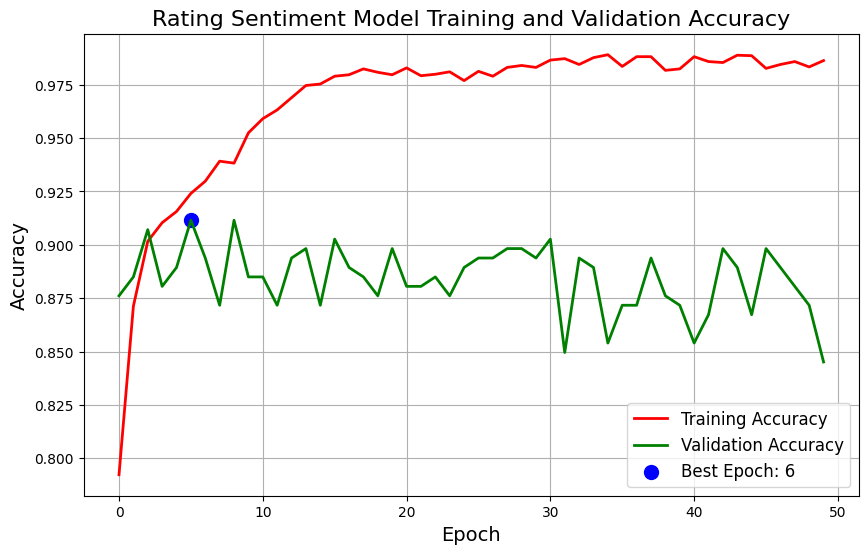

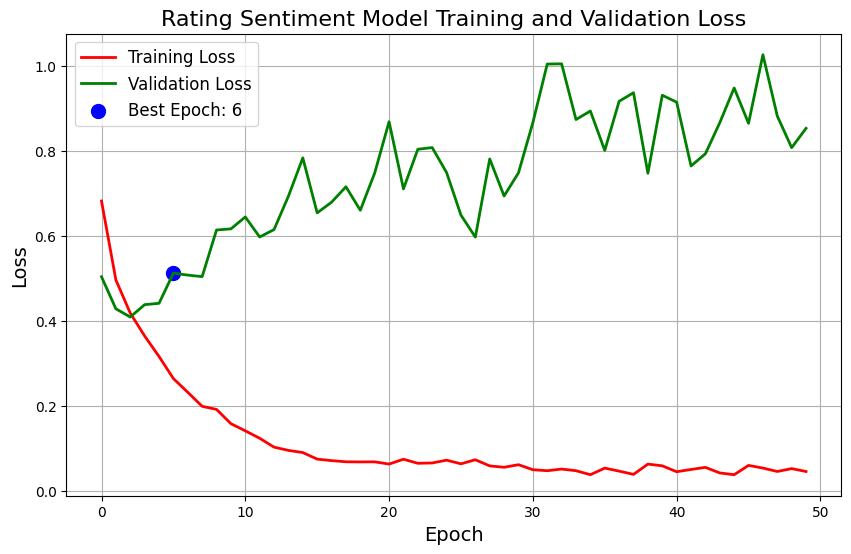

In [ ]:
model_name = "TRANSCNN"
visual_title = "Rating Sentiment Model"

# Extract training and validation accuracy from history
train_accuracy = locals()["history_" + model_name].history['accuracy']
val_accuracy = locals()["history_" + model_name].history['val_accuracy']

# Set the font to Times New Roman
# matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', linewidth=2, color='red')
plt.plot(val_accuracy, label='Validation Accuracy', linewidth=2, color='green')

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy))
best_val_accuracy = max(val_accuracy)

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_accuracy, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title(visual_title + ' Training and Validation Accuracy', fontsize=16)

# Add legend
plt.legend(fontsize=12)
plt.grid()
# Show the plot
plt.show()


# Extract training and validation accuracy from history
train_loss = locals()["history_" + model_name].history['loss']
val_loss = locals()["history_" + model_name].history['val_loss']

# Set the font to Times New Roman
# matplotlib.rcParams['font.family'] = 'Arial'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', linewidth=2, color='red')
plt.plot(val_loss, label='Validation Loss', linewidth=2, color='green')

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title(visual_title + ' Training and Validation Loss', fontsize=16)

# Find the epoch with the highest validation accuracy
best_val_loss = val_loss[best_epoch]

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_loss, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add legend
plt.legend(fontsize=12)
plt.grid()

# Show the plot
plt.show()

In [ ]:
filename = 'review_category_variables.pkl'

# Load the variables from the pickle file
with open(filename, 'rb') as file:
    loaded_variables = pickle.load(file)

# You can access the individual variables from the loaded dictionary
start_time_review_category = loaded_variables['start_time_review_category']
history_review_category = loaded_variables['history_review_category']
end_time_review_category = loaded_variables['end_time_review_category']

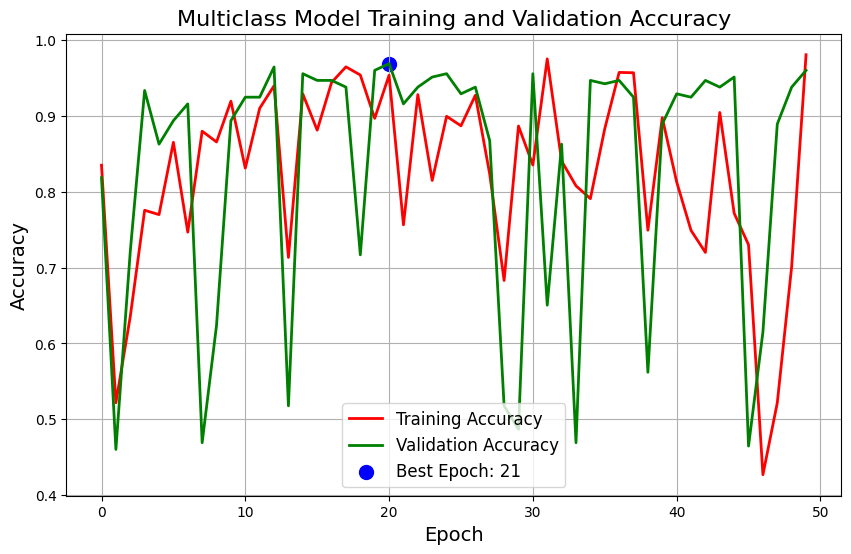

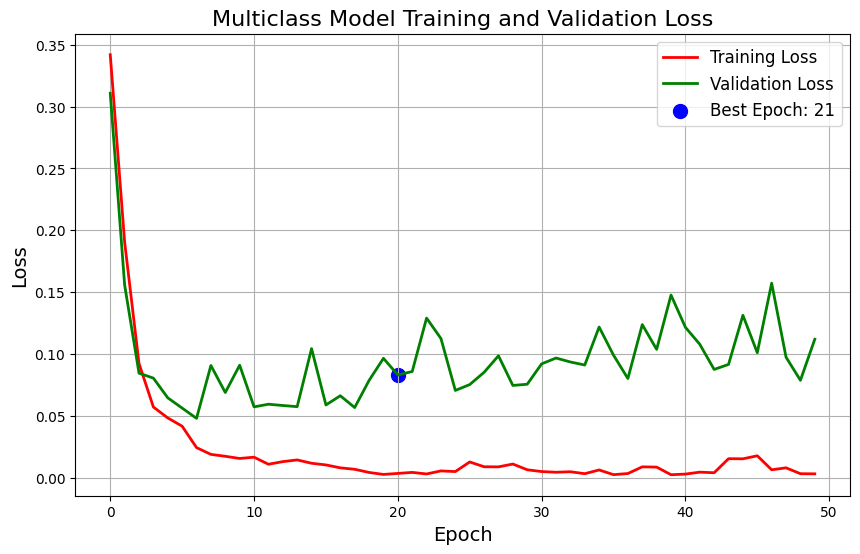

In [ ]:
model_name = "review_category"
visual_title = "Multiclass Model"

# Extract training and validation accuracy from history
train_accuracy = locals()["history_" + model_name].history['accuracy']
val_accuracy = locals()["history_" + model_name].history['val_accuracy']

# Set the font to Times New Roman
# matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', linewidth=2, color='red')
plt.plot(val_accuracy, label='Validation Accuracy', linewidth=2, color='green')

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy))
best_val_accuracy = max(val_accuracy)

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_accuracy, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title(visual_title + ' Training and Validation Accuracy', fontsize=16)

# Add legend
plt.legend(fontsize=12)
plt.grid()
# Show the plot
plt.show()


# Extract training and validation accuracy from history
train_loss = locals()["history_" + model_name].history['loss']
val_loss = locals()["history_" + model_name].history['val_loss']

# Set the font to Times New Roman
# matplotlib.rcParams['font.family'] = 'Arial'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', linewidth=2, color='red')
plt.plot(val_loss, label='Validation Loss', linewidth=2, color='green')

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title(visual_title + ' Training and Validation Loss', fontsize=16)

# Find the epoch with the highest validation accuracy
best_val_loss = val_loss[best_epoch]

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_loss, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add legend
plt.legend(fontsize=12)
plt.grid()

# Show the plot
plt.show()

In [ ]:
filename = 'human_feedback_variables.pkl'

# Load the variables from the pickle file
with open(filename, 'rb') as file:
    loaded_variables = pickle.load(file)

# You can access the individual variables from the loaded dictionary
start_time_human_feedback = loaded_variables['start_time_human_feedback']
history_human_feedback = loaded_variables['history_human_feedback']
end_time_human_feedback = loaded_variables['end_time_human_feedback']

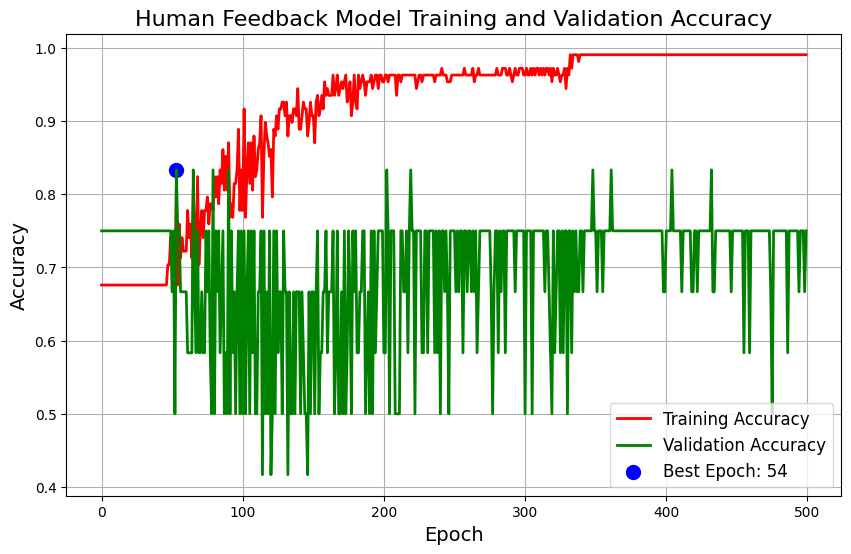

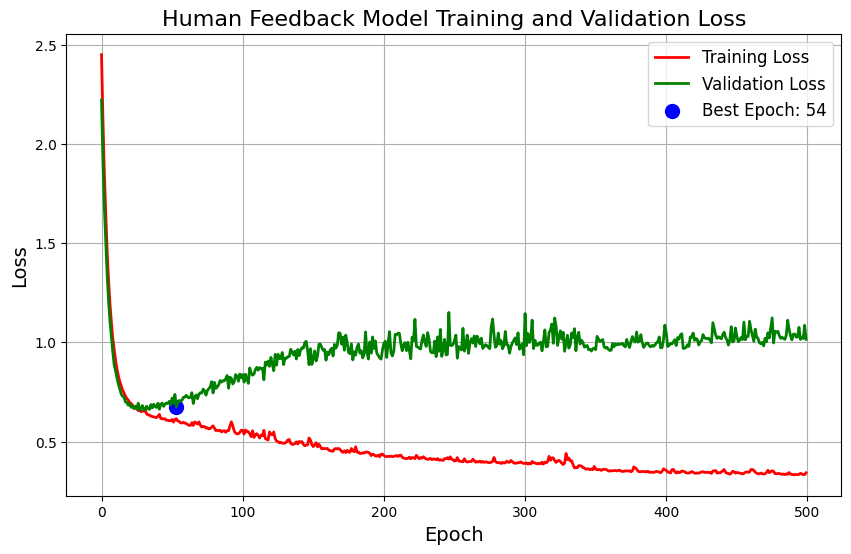

In [ ]:
model_name = "human_feedback"
visual_title = "Human Feedback Model"

# Extract training and validation accuracy from history
train_accuracy = locals()["history_" + model_name].history['accuracy']
val_accuracy = locals()["history_" + model_name].history['val_accuracy']

# Set the font to Times New Roman
# matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', linewidth=2, color='red')
plt.plot(val_accuracy, label='Validation Accuracy', linewidth=2, color='green')

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy))
best_val_accuracy = max(val_accuracy)

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_accuracy, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title(visual_title + ' Training and Validation Accuracy', fontsize=16)

# Add legend
plt.legend(fontsize=12)
plt.grid()
# Show the plot
plt.show()


# Extract training and validation accuracy from history
train_loss = locals()["history_" + model_name].history['loss']
val_loss = locals()["history_" + model_name].history['val_loss']

# Set the font to Times New Roman
# matplotlib.rcParams['font.family'] = 'Arial'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', linewidth=2, color='red')
plt.plot(val_loss, label='Validation Loss', linewidth=2, color='green')

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title(visual_title + ' Training and Validation Loss', fontsize=16)

# Find the epoch with the highest validation accuracy
best_val_loss = val_loss[best_epoch]

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_loss, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add legend
plt.legend(fontsize=12)
plt.grid()

# Show the plot
plt.show()